# **Investigating Correlation in Online Anxiety: Classify Gamers Mentality**

## **Problem Description**

Playing online video games has become widely prevalent over the last decade. Consequently, concerns have been voiced in regard to addictive online gaming behavior. At present, research in this area relies on relatively small sample sizes from around 150 to 3500 participants and are mostly focused on narrow cultural backgrounds or only young adults. The present data is the largest openly available dataset comprising of over 13,000 participants from all over the world.

With over 13,000 participants, this is the biggest openly available dataset connecting gaming habits, various socio-economic factors and measures of anxiety, social phobia, life satisfaction and narcissism.

## **Dataset**

This dataset includes data collected from a variety of survey among gamers worldwide. The questionnaire asked questions that psychologists generally ask people who are prone to anxiety, social phobia, and less to no life satisfaction. The questionnaire consists of several set of questions as asked as a part of psychological study. The original data was collated by Marian Sauter and Dejan Draschkow from the Open Science Framework (OSF) public databank.

The dataset consists of 55 columns that correspond to every question asked in the questionnaire. Most of the columns correspond to different scoring criteria used in psychology like GAD (General Anxiety Disorder), SWL (Satisfaction with Life) an and SPIN (Social Phobia Inventory) scores. There are a few generic questions about where the people are born and why do they lay online games etc.

## **Purpose**

Investigate and understand the relationship between gaming habits and psychological well-being, specifically focusing on anxiety levels, life satisfaction, and social phobia among individuals who engage in video gaming.

By analyzing and studying these factors, the project aims to uncover valuable insights into the following:

1. How do different gaming habits relate to levels of anxiety among gamers?
2. Is there a connection between the amount of time spent gaming and an individual's overall life satisfaction?
3. Do certain gaming preferences or playstyles correlate with higher levels of social phobia?
4. What are the demographic and background factors that influence these relationships?

This research can help identify potential areas for intervention or support for individuals experiencing mental health challenges related to their gaming habits. This contributes to our broader understanding of the impact of video games on mental and social aspects of life.









**Import Packages**

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error ,confusion_matrix,accuracy_score
import string as st
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [186]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/My Github Repository/online-game-anxiety-all')

## **Read Dataset**

In [189]:
df = pd.read_csv('GamingStudy_data.csv', encoding = 'ISO-8859-1')

In [190]:
df.head()

Unnamed: 0   Zeitstempel  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0           1  42052.004366     0     0     0     0     1     0     0   
1           2  42052.006803     1     2     2     2     0     1     0   
2           3  42052.038599     0     2     2     0     0     3     1   
3           4  42052.068037     0     0     0     0     0     0     0   
4           5  42052.089478     2     1     2     2     2     3     2   

                   GADE  ...  Birthplace    Residence  Reference  \
0  Not difficult at all  ...         USA          USA     Reddit   
1    Somewhat difficult  ...         USA          USA     Reddit   
2  Not difficult at all  ...     Germany      Germany     Reddit   
3  Not difficult at all  ...         USA          USA     Reddit   
4        Very difficult  ...         USA  South Korea     Reddit   

                                           Playstyle  accept GAD_T SWL_T  \
0                                       Singleplayer  Accept     1    23   
1              Multiplayer - online - with strangers  Accept     8    16   
2                                       Singleplayer  Accept     8    17   
3  Multiplayer - online - with online acquaintanc...  Accept     0    17   
4              Multiplayer - online - with strangers  Accept    14    14   

   SPIN_T Residence_ISO3 Birthplace_ISO3  
0     5.0            USA             USA  
1    33.0            USA             USA  
2    31.0            DEU             DEU  
3    11.0            USA             USA  
4    13.0            KOR             USA  

[5 rows x 55 columns]

In [191]:
df.drop(['Unnamed: 0', 'Zeitstempel'], axis=1, inplace=True)

In [192]:
df.describe().T

count       mean        std   min   25%   50%   75%     max
GAD1           13464.0   0.860963   0.926542   0.0   0.0   1.0   1.0     3.0
GAD2           13464.0   0.673351   0.915724   0.0   0.0   0.0   1.0     3.0
GAD3           13464.0   0.965761   0.982776   0.0   0.0   1.0   2.0     3.0
GAD4           13464.0   0.724079   0.921971   0.0   0.0   0.0   1.0     3.0
GAD5           13464.0   0.488042   0.837014   0.0   0.0   0.0   1.0     3.0
GAD6           13464.0   0.911022   0.931168   0.0   0.0   1.0   1.0     3.0
GAD7           13464.0   0.588755   0.894408   0.0   0.0   0.0   1.0     3.0
SWL1           13464.0   3.720440   1.736264   1.0   2.0   4.0   5.0     7.0
SWL2           13464.0   4.602050   1.696276   1.0   3.0   5.0   6.0     7.0
SWL3           13464.0   4.345440   1.809430   1.0   3.0   5.0   6.0     7.0
SWL4           13464.0   3.762032   1.818136   1.0   2.0   4.0   5.0     7.0
SWL5           13464.0   3.358883   1.916319   1.0   2.0   3.0   5.0     7.0
Hours          13434.0  22.247357  70.284502   0.0  12.0  20.0  28.0  8000.0
highestleague      0.0        NaN        NaN   NaN   NaN   NaN   NaN     NaN
streams        13364.0  11.233538  78.549209   0.0   4.0   8.0  15.0  9001.0
SPIN1          13340.0   0.856897   0.907351   0.0   0.0   1.0   1.0     4.0
SPIN2          13310.0   1.210969   1.144054   0.0   0.0   1.0   2.0     4.0
SPIN3          13324.0   1.095392   1.164982   0.0   0.0   1.0   2.0     4.0
SPIN4          13305.0   1.682976   1.229730   0.0   1.0   2.0   3.0     4.0
SPIN5          13298.0   1.248985   1.221828   0.0   0.0   1.0   2.0     4.0
SPIN6          13308.0   1.348287   1.279251   0.0   0.0   1.0   2.0     4.0
SPIN7          13326.0   1.050503   1.221171   0.0   0.0   1.0   2.0     4.0
SPIN8          13320.0   1.405030   1.372777   0.0   0.0   1.0   2.0     4.0
SPIN9          13306.0   1.567338   1.383539   0.0   0.0   1.0   3.0     4.0
SPIN10         13304.0   0.917769   1.125849   0.0   0.0   1.0   1.0     4.0
SPIN11         13277.0   1.827446   1.488372   0.0   0.0   2.0   3.0     4.0
SPIN12         13296.0   0.892148   1.158235   0.0   0.0   0.0   1.0     4.0
SPIN13         13277.0   0.538827   0.944180   0.0   0.0   0.0   1.0     4.0
SPIN14         13308.0   1.252405   1.207463   0.0   0.0   1.0   2.0     4.0
SPIN15         13317.0   1.411054   1.349874   0.0   0.0   1.0   2.0     4.0
SPIN16         13317.0   0.620635   0.961853   0.0   0.0   0.0   1.0     4.0
SPIN17         13289.0   0.935962   1.180456   0.0   0.0   0.0   2.0     4.0
Narcissism     13441.0   2.027677   1.061842   1.0   1.0   2.0   3.0     5.0
Age            13464.0  20.930407   3.300897  18.0  18.0  20.0  22.0    63.0
GAD_T          13464.0   5.211973   4.713267   0.0   2.0   4.0   8.0    21.0
SWL_T          13464.0  19.788844   7.229243   5.0  14.0  20.0  26.0    35.0
SPIN_T         12814.0  19.848525  13.467493   0.0   9.0  17.0  28.0    68.0

In [193]:
df.dtypes

GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
highestleague      float64
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
SPIN16             float64
S

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             12815 non-null  object 
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  object 
 14  Platform         13464 non-null  object 
 15  Hours            13434 non-null  float64
 16  earnings         13464 non-null  object 
 17  whyplay     

In [195]:
df.isnull().sum()

GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Gender                 0


In [196]:
df.isnull().sum()

GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Gender                 0


**Values analysis**

In [197]:
for i in df:
    print('------', i, '------')
    print('Unique Values:')
    print(df[i].unique()[:30])
    print('Number of Unique Values:', df[i].nunique())
    print('-------------')


------ GAD1 ------
Unique Values:
[0 1 2 3]
Number of Unique Values: 4
-------------
------ GAD2 ------
Unique Values:
[0 2 1 3]
Number of Unique Values: 4
-------------
------ GAD3 ------
Unique Values:
[0 2 3 1]
Number of Unique Values: 4
-------------
------ GAD4 ------
Unique Values:
[0 2 3 1]
Number of Unique Values: 4
-------------
------ GAD5 ------
Unique Values:
[1 0 2 3]
Number of Unique Values: 4
-------------
------ GAD6 ------
Unique Values:
[0 1 3 2]
Number of Unique Values: 4
-------------
------ GAD7 ------
Unique Values:
[0 1 2 3]
Number of Unique Values: 4
-------------
------ GADE ------
Unique Values:
['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
Number of Unique Values: 4
-------------
------ SWL1 ------
Unique Values:
[3 2 5 7 6 1 4]
Number of Unique Values: 7
-------------
------ SWL2 ------
Unique Values:
[5 6 2 4 3 7 1]
Number of Unique Values: 7
-------------
------ SWL3 ------
Unique Values:
[5 2 4 3 6 7 1]
Number o

**Data Cleaning**

In [198]:
df.shape

(13464, 53)

Creates a new column named `Hours_streams` while dropping the selected rows where the `Hours_streams` has values greater than 115 or is equal to 0

In [199]:
df['Hours_streams'] = df['Hours'] + df['streams']
df.drop(df[(df['Hours_streams'] > 115) | (df['Hours_streams'] == 0)].index, axis=0, inplace=True)

In [200]:
df['Hours_streams'].value_counts()

30.0     961
25.0     763
40.0     732
35.0     689
20.0     662
        ... 
99.0       1
87.0       1
81.0       1
94.0       1
109.0      1
Name: Hours_streams, Length: 108, dtype: int64

Filling in missing values in the GAD (General Anxiety Disorder) column with the index of the second most common value, `Somewhat difficult`.

In [201]:
df.GADE.value_counts()

Not difficult at all    6218
Somewhat difficult      5132
Very difficult          1004
Extremely difficult      409
Name: GADE, dtype: int64

In [202]:
df.GADE.fillna(df.GADE.value_counts().index[1] , inplace=True) #1

In [203]:
df.GADE.value_counts()

Not difficult at all    6218
Somewhat difficult      5780
Very difficult          1004
Extremely difficult      409
Name: GADE, dtype: int64

In [204]:
df.shape

(13411, 54)

`(13411, 55)` suggests that we have fewer rows following our data cleaning. Let's fill missing `streams` and `Hours` values with their mean.








In [205]:
df.streams.fillna(int(df.streams.mean()) , inplace = True)
df.Hours.fillna(int(df.Hours.mean()) , inplace = True)

In [206]:
df.drop('Hours_streams' , axis=1 , inplace=True)

Clean and standardize the `League` column by converting text to lowercase, stripping whitespace, extracting relevant characters, mapping values to standardized categories, filtering out infrequent values, and replacing certain words with NaN

In [207]:
# Clean and standardize 'League' column
df['League'] = df['League'].str.lower().str.strip()
mapping_dict = {
    'g': 'gold', 'gv': 'gold', 'golden': 'gold', 'glod': 'gold',
    'golld': 'gold', 'golf': 'gold', 'goled': 'gold', 'golderino': 'gold', 'giii': 'gold',
    'silverii': 'silver', 's': 'silver', 'sliver': 'silver', 'siver': 'silver',
    'silber': 'silver', 'sil': 'silver', 'silveriv': 'silver',
    'platinium': 'platinum', 'platnium': 'platinum', 'platin': 'platinum',
    'pplatinum': 'platinum', 'plarinum': 'platinum', 'platium': 'platinum', 'p': 'platinum',
    'platine': 'platinum', 'platinun': 'platinum', 'platonum': 'platinum',
    'platnum': 'platinum', 'plata': 'platinum', 'plantinum': 'platinum',
    'platinuim': 'platinum', 'platunum': 'platinum', 'plantinum': 'platinum',
    'platunum': 'platinum', 'platinumm': 'platinum', 'platv': 'platinum',
    'platina': 'platinum', 'plat': 'platinum',
    'bronce': 'bronze', 'b': 'bronze', 'broze': 'bronze',
    'lowest': 'bronze', 'wood': 'bronze', 'elohell': 'bronze',
    'none': 'unranked', 'na': 'unranked', 'not': 'unranked', 'n': 'unranked',
    'promos': 'unranked', 'provisional': 'unranked', 'placements': 'unranked',
    'dont': 'unranked', 'was': 'unranked', 'unraked': 'unranked', 'havent': 'unranked',
    'never': 'unranked', 'nope': 'unranked', 'no': 'unranked', 'noone': 'unranked',
    'don': 'unranked', 'of': 'unranked', 'unrranked': 'unranked', 'new': 'unranked',
    'what': 'unranked', 'unrank': 'unranked', 'ranked': 'unranked',
    'placement': 'unranked', 'unrankt': 'unranked', 'non': 'unranked',
    'unfranked': 'unranked', 'promotion': 'unranked', 'idk': 'unranked',
    'unplaced': 'unranked', 'probably': 'unranked', 'provisionals': 'unranked',
    'didnt': 'unranked', 'unrakned': 'unranked', 'unfinished': 'unranked',
    'just': 'unranked', 'x': 'unranked', 'promotions': 'unranked',
    'unseeded': 'unranked', 'haven': 'unranked',
    'd': 'diamond', 'dia': 'diamond', 'diaomnd': 'diamond', 'diamont': 'diamond', 'diamomd': 'diamond',
    'grand': 'grandmaster', 'gm': 'grandmaster', 'grandmasters': 'grandmaster',
    'challenjour': 'challenger', 'c': 'challenger', 'charrenjour': 'challenger', 'challeneger': 'challenger',
    'mg': 'mge', 'masters': 'master', 'le': 'legendary', 'legdendary': 'legendary',
}

df['League'] = df['League'].replace(mapping_dict)

In [208]:
# Filter out infrequent values
counts = df['League'].value_counts()
df['League'] = df['League'][~df['League'].isin(counts[counts < 3].index)]

In [209]:
# Replace certain words with NaN
words_to_replace = ['i', 'currently', 'high', 'season', 'lol', 'cs', 'last', 'csgo', 'starcraft',
                    'geater', 'in', 'rank', 'still']
df['League'] = df['League'].replace(words_to_replace, np.nan)

In [210]:
# Fill remaining missing values with 'unspecified'
df['League'].fillna('unspecified', inplace=True)

In [211]:
# Print the unique values and their counts
print(df['League'].unique())
print(df['League'].value_counts())

['unspecified' '-' 'gold' 'unranked' 'bronze' 'silver 4' 'n/a' 'gold nova'
 'not applicable' '0' 'silver 2' '/' 'bronze 5' 'diamond' 'master'
 'silver' 'platinum 3' 'gold 4' 'gold iv' 'platinum' 'challenger' 'gold v'
 'diamond 2' 'gold 1' 'platinum 4' 'gold 5' 'bronze 1' 'diamond 4'
 'platin v' 'gold 3' 'diamond 1' 'diamond 5' 'gold iii' 'platinum 2'
 'bronze iv' 'silver 1' 'diamond v' 'platinum v' 'platin 5' 'master 1'
 'd5' 'silver 3' 'platin 3' 'gold 2' 'plat 5' 'diamond 3' 'plat 1'
 'bronze ii' 'silver iv' 'platinum 1' 'gold ii' 'gold i' 'bronze 4'
 'grandmaster' 'silver iii' 'platinum 5' 'bronze 2' 'plat 2' 'diamond iv'
 'bronze iii' 'silver v' 'diamond ii' 's3' 'silver i' 'bronze 3' 'plat 3'
 'silver 5' 'plat v' 'platinium 5' 'platin 2' 'd3' 'platinum iii'
 'platinum iv' 'd2' 'plat 4' 'gold nova 3' 'silver ii' 'platinum ii'
 'master i' 'g1' 's2' 'silver/gold' 'gold5' 'not ranked' 'plat2' 'plat ii'
 'legend' 'dmg' 'sliver 5' 'diamond i' 's4' 'master tier' 'platinium 2'
 'platin 1'

Let's continue the data cleaning and preprocessing steps, including handling missing values, dropping columns, standardizing text columns, and replacing less frequent values with `Other` or `NaN`.

In [212]:
# Clean and standardize 'Narcissism' column
df['Narcissism'].value_counts()

1.0    5240
2.0    4344
3.0    2335
4.0    1147
5.0     322
Name: Narcissism, dtype: int64

In [213]:
# Drop 'Birthplace' and 'Birthplace_ISO3' columns
df.drop(["Birthplace", "Birthplace_ISO3"], axis=1, inplace=True)

In [214]:
# Replace 'Unknown' with the mode of 'Residence'
df['Residence'] = df['Residence'].replace('Unknown', df['Residence'].mode()[0])

In [215]:
# Fill missing values in 'Reference' with 'Other'
df['Reference'].fillna('Other', inplace=True)

In [216]:
# Drop rows with missing values in 'accept'
df.drop(df[df['accept'].isnull()].index, axis=0, inplace=True)

In [217]:
# Fill missing values in 'Residence_ISO3', specifically replace index 11063
df['Residence_ISO3'].fillna('USA', inplace=True)
df.loc[11063, 'Residence_ISO3'] = 'XXK'

In [218]:
# Fill missing values in multiple columns with their respective modes
col = ['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9',
       'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'SPIN_T']
for i in col:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [219]:
# Clean and standardize text columns 'Playstyle', 'earnings', and 'whyplay'
text_columns = ['Playstyle', 'earnings', 'whyplay']
for col in text_columns:
    df[col] = df[col].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
    df[col] = df[col].str.lower().str.strip()

In [220]:
# Drop 'highestleague' column
df.drop('highestleague', axis=1, inplace=True)

In [221]:
# Fill missing values in 'Work' with the mode
df['Work'].fillna(df['Work'].mode()[0], inplace=True)

In [222]:
# Replace less frequent values in 'earnings' with 'Other'
df.earnings.replace(df.earnings.value_counts().index[3:], 'Other', inplace=True)

In [223]:
# Replace less frequent values in 'whyplay' with 'Other'
df.whyplay.replace(df.whyplay.value_counts().index[5:], 'Other', inplace=True)

In [224]:
# Replace less frequent values in 'Playstyle' with 'Other'
df.Playstyle.replace(df.Playstyle.value_counts().index[5:], 'Other', inplace=True)
df.Playstyle.replace('Other', np.nan, inplace=True)
df.whyplay.replace('Other', np.nan, inplace=True)
df.earnings.replace('Other', np.nan, inplace=True)

In [225]:
# Drop rows with any remaining missing values
df.dropna(inplace=True)

In [226]:
df.isnull().sum()

GAD1              0
GAD2              0
GAD3              0
GAD4              0
GAD5              0
GAD6              0
GAD7              0
GADE              0
SWL1              0
SWL2              0
SWL3              0
SWL4              0
SWL5              0
Game              0
Platform          0
Hours             0
earnings          0
whyplay           0
League            0
streams           0
SPIN1             0
SPIN2             0
SPIN3             0
SPIN4             0
SPIN5             0
SPIN6             0
SPIN7             0
SPIN8             0
SPIN9             0
SPIN10            0
SPIN11            0
SPIN12            0
SPIN13            0
SPIN14            0
SPIN15            0
SPIN16            0
SPIN17            0
Narcissism        0
Gender            0
Age               0
Work              0
Degree            0
Residence         0
Reference         0
Playstyle         0
accept            0
GAD_T             0
SWL_T             0
SPIN_T            0
Residence_ISO3    0


In [227]:
df.shape

(12081, 50)

## **Exploratory Data Analysis (EDA)**

**Step 1: Set Font Parameters and Display Initial Data**

In [228]:
# Set font and style parameters
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

# Display the first two rows of the DataFrame
df.head(2)

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  SWL2  \
0     0     0     0     0     1     0     0  Not difficult at all     3     5   
1     1     2     2     2     0     1     0    Somewhat difficult     3     5   

   ...                       Work                    Degree  Residence  \
0  ...  Unemployed / between jobs  Bachelor (or equivalent)        USA   
1  ...  Unemployed / between jobs  Bachelor (or equivalent)        USA   

  Reference                            Playstyle  accept GAD_T SWL_T SPIN_T  \
0    Reddit                         singleplayer  Accept     1    23    5.0   
1    Reddit  multiplayer  online  with strangers  Accept     8    16   33.0   

   Residence_ISO3  
0             USA  
1             USA  

[2 rows x 50 columns]

**Step 2: Normalize Selected Columns**

In [229]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to normalize
cols_to_normalize = ['Hours', 'streams', 'Age', 'GAD_T', 'SWL_T', 'SPIN_T']
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply Min-Max scaling to the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


**Step 3: Handle Outliers with Box Plots**

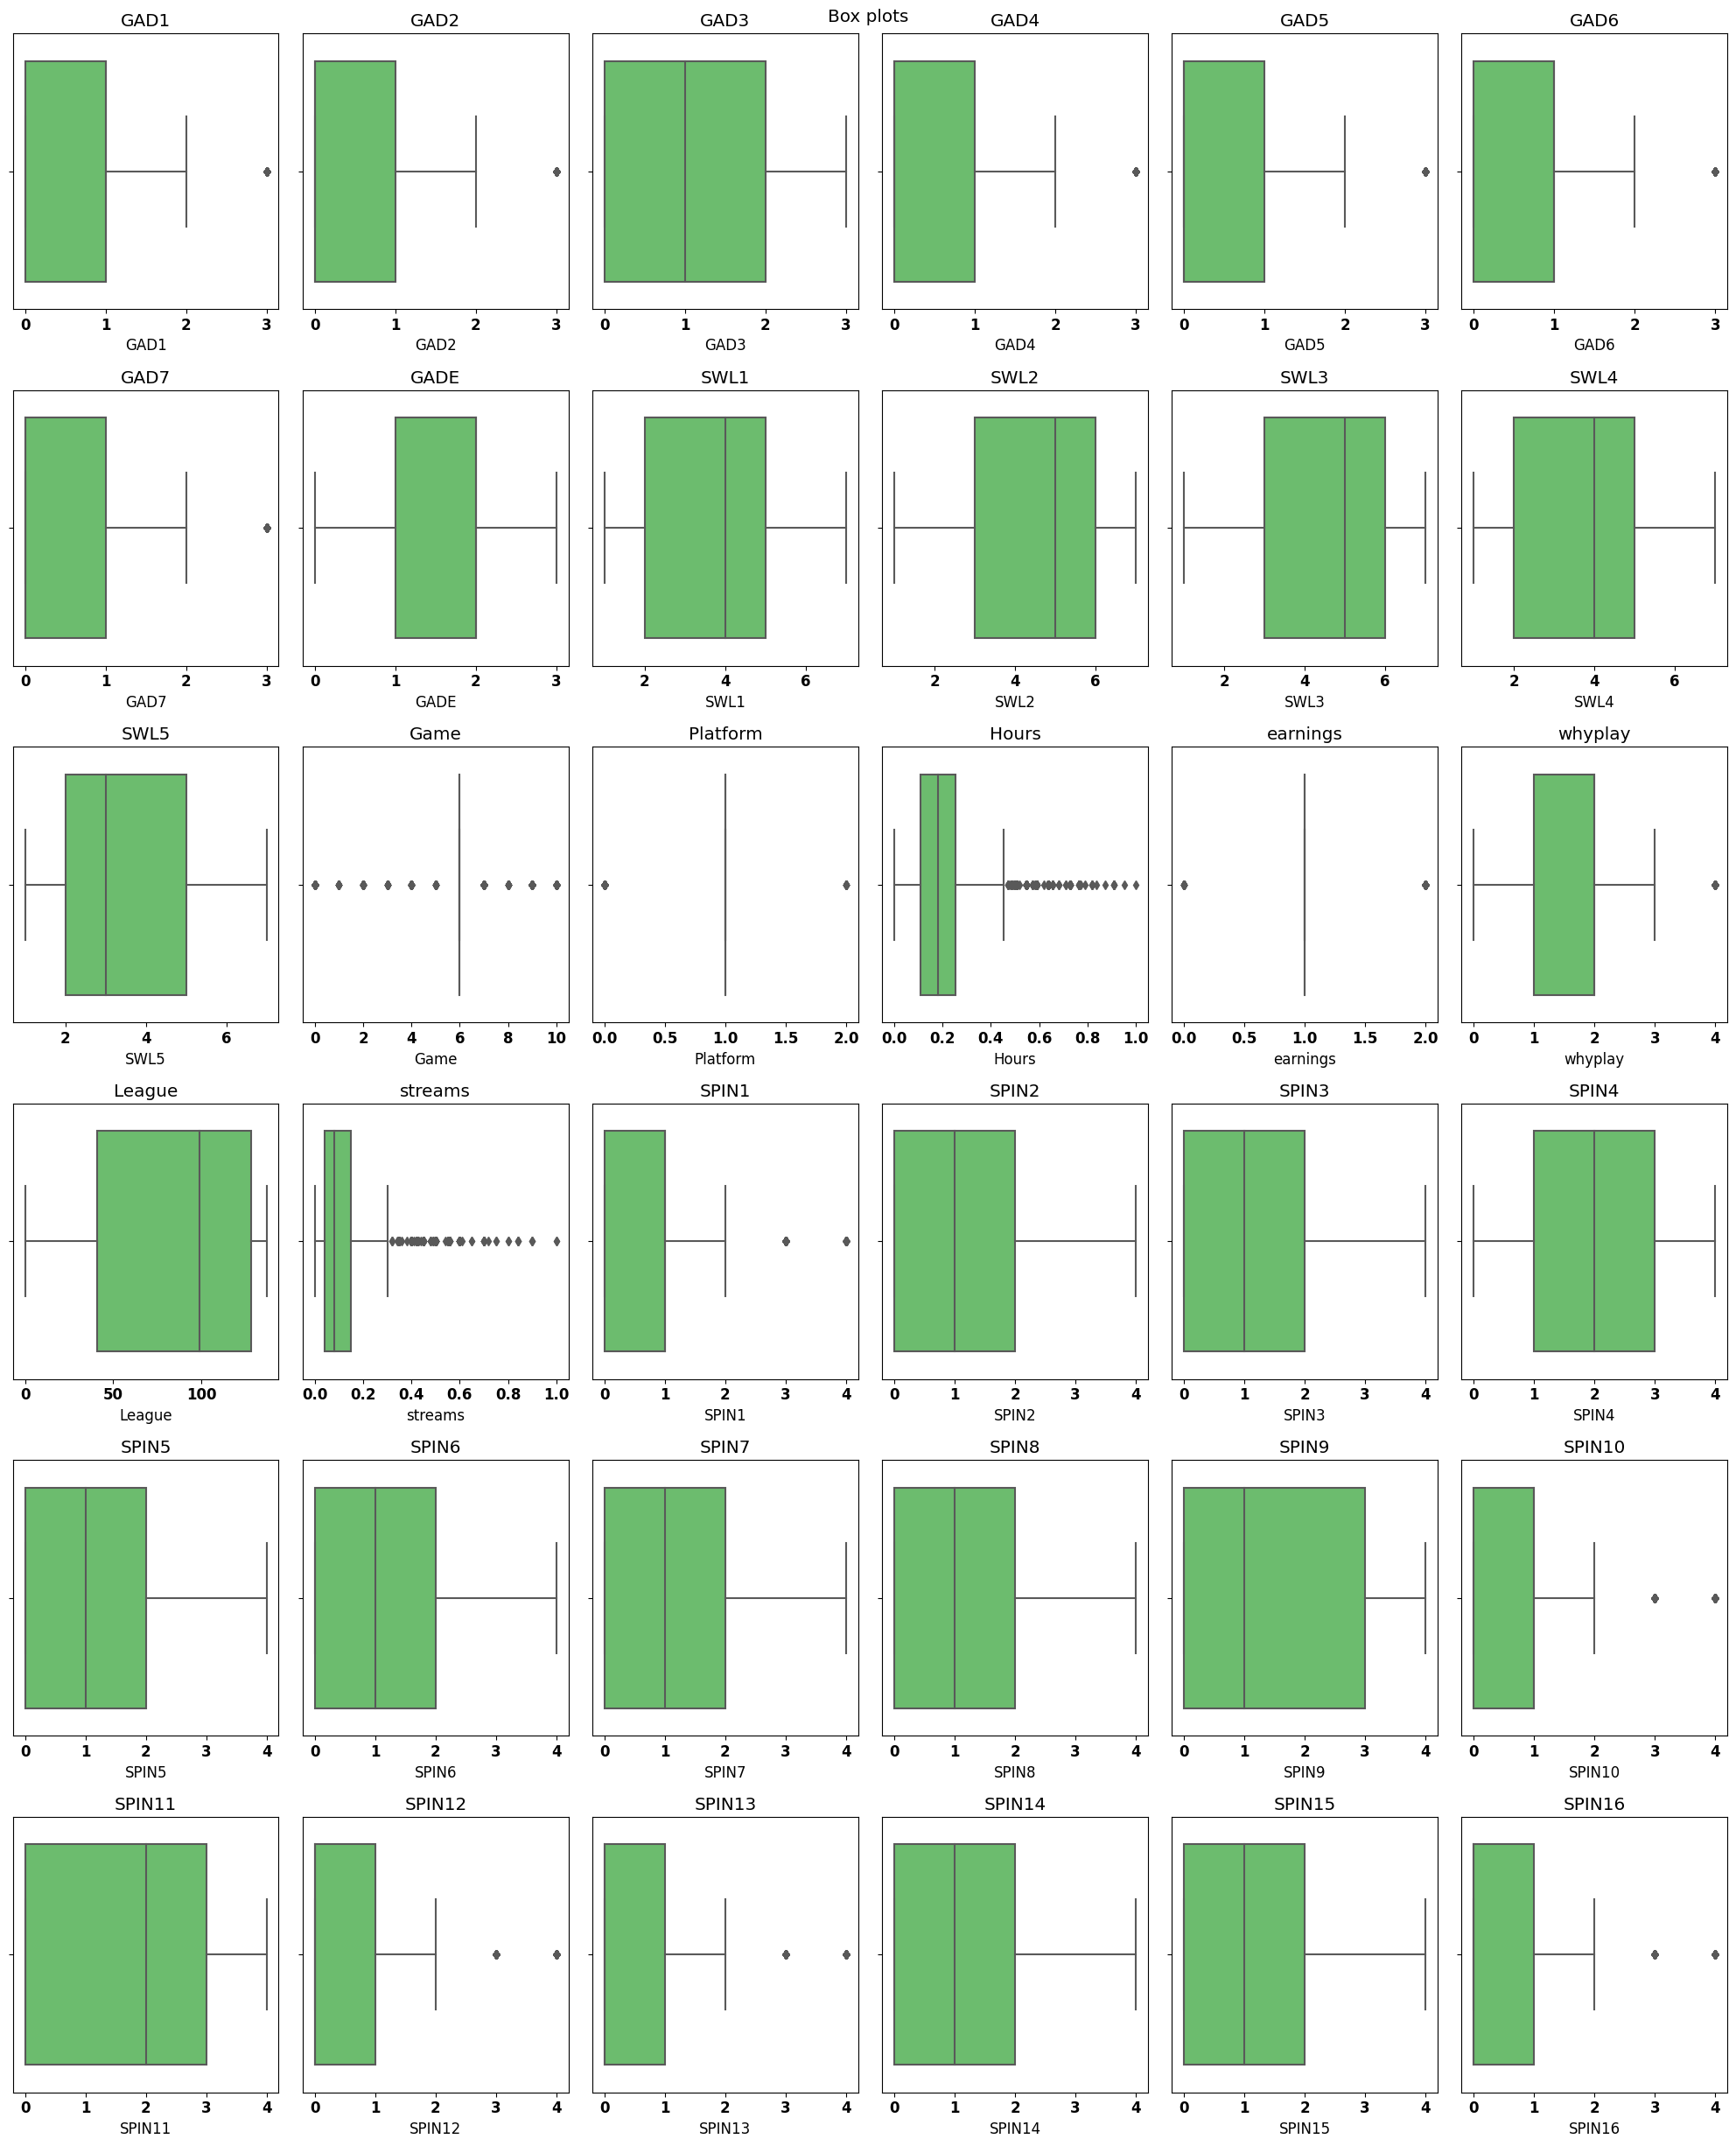

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

# Set up subplots in a grid
fig, axes = plt.subplots(6, 6, figsize=(20, 25))
axes = axes.flatten()

# Loop through numerical columns and create box plots
numerical_cols = df.select_dtypes(exclude=['object']).columns
for i, col_name in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(x=df[col_name], orient='h', ax=axes[i])
        axes[i].set_title(col_name)

# Set the main title and adjust layout
fig.suptitle('Box plots')
plt.tight_layout()

# Show the box plots
plt.show()

**Step 4: Remove Rows with Age > 50**

In [231]:
df = df[df['Age'] <= 50]

**Step 5: Create a Correlation Matrix**

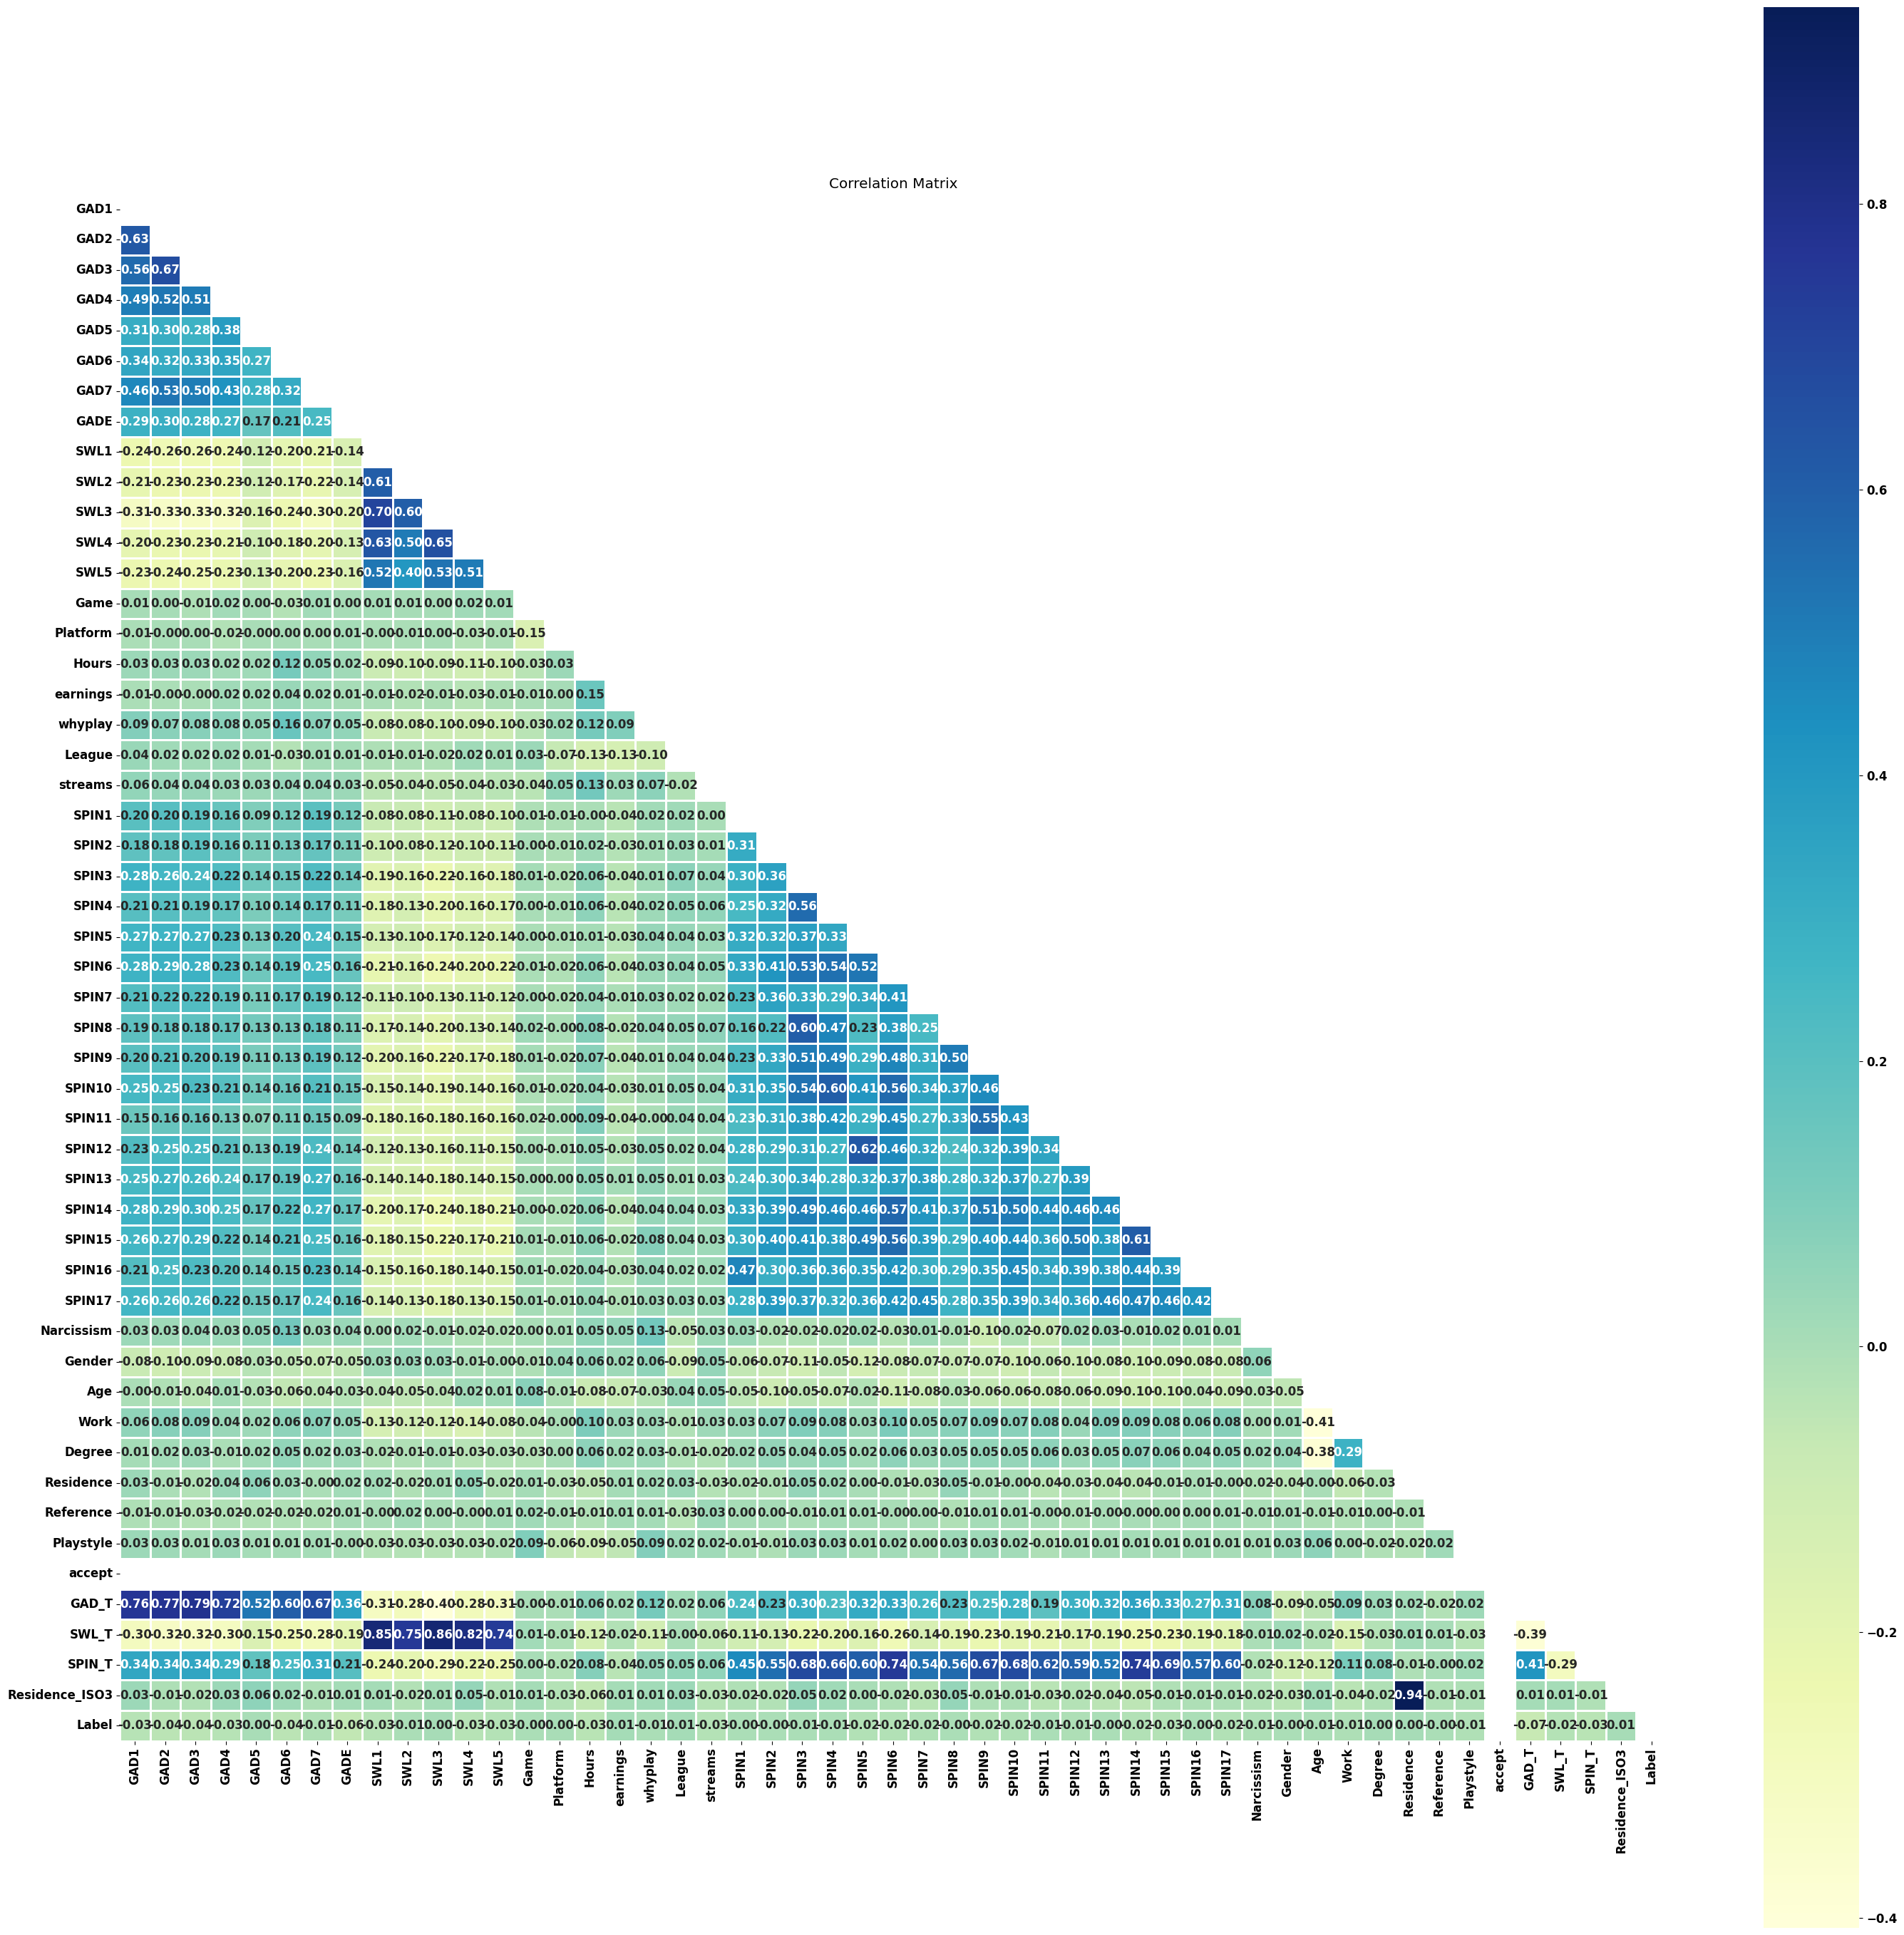

In [283]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

# Compute the Spearman correlation matrix
corr_matrix = df.corr(method='spearman')
# Create a mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set the figure size and create a heatmap
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f", square=True)
# Add a title to the heatmap
plt.title('Correlation Matrix')
# Display the heatmap
plt.show()

**Step 6: Plot Density Distributions**

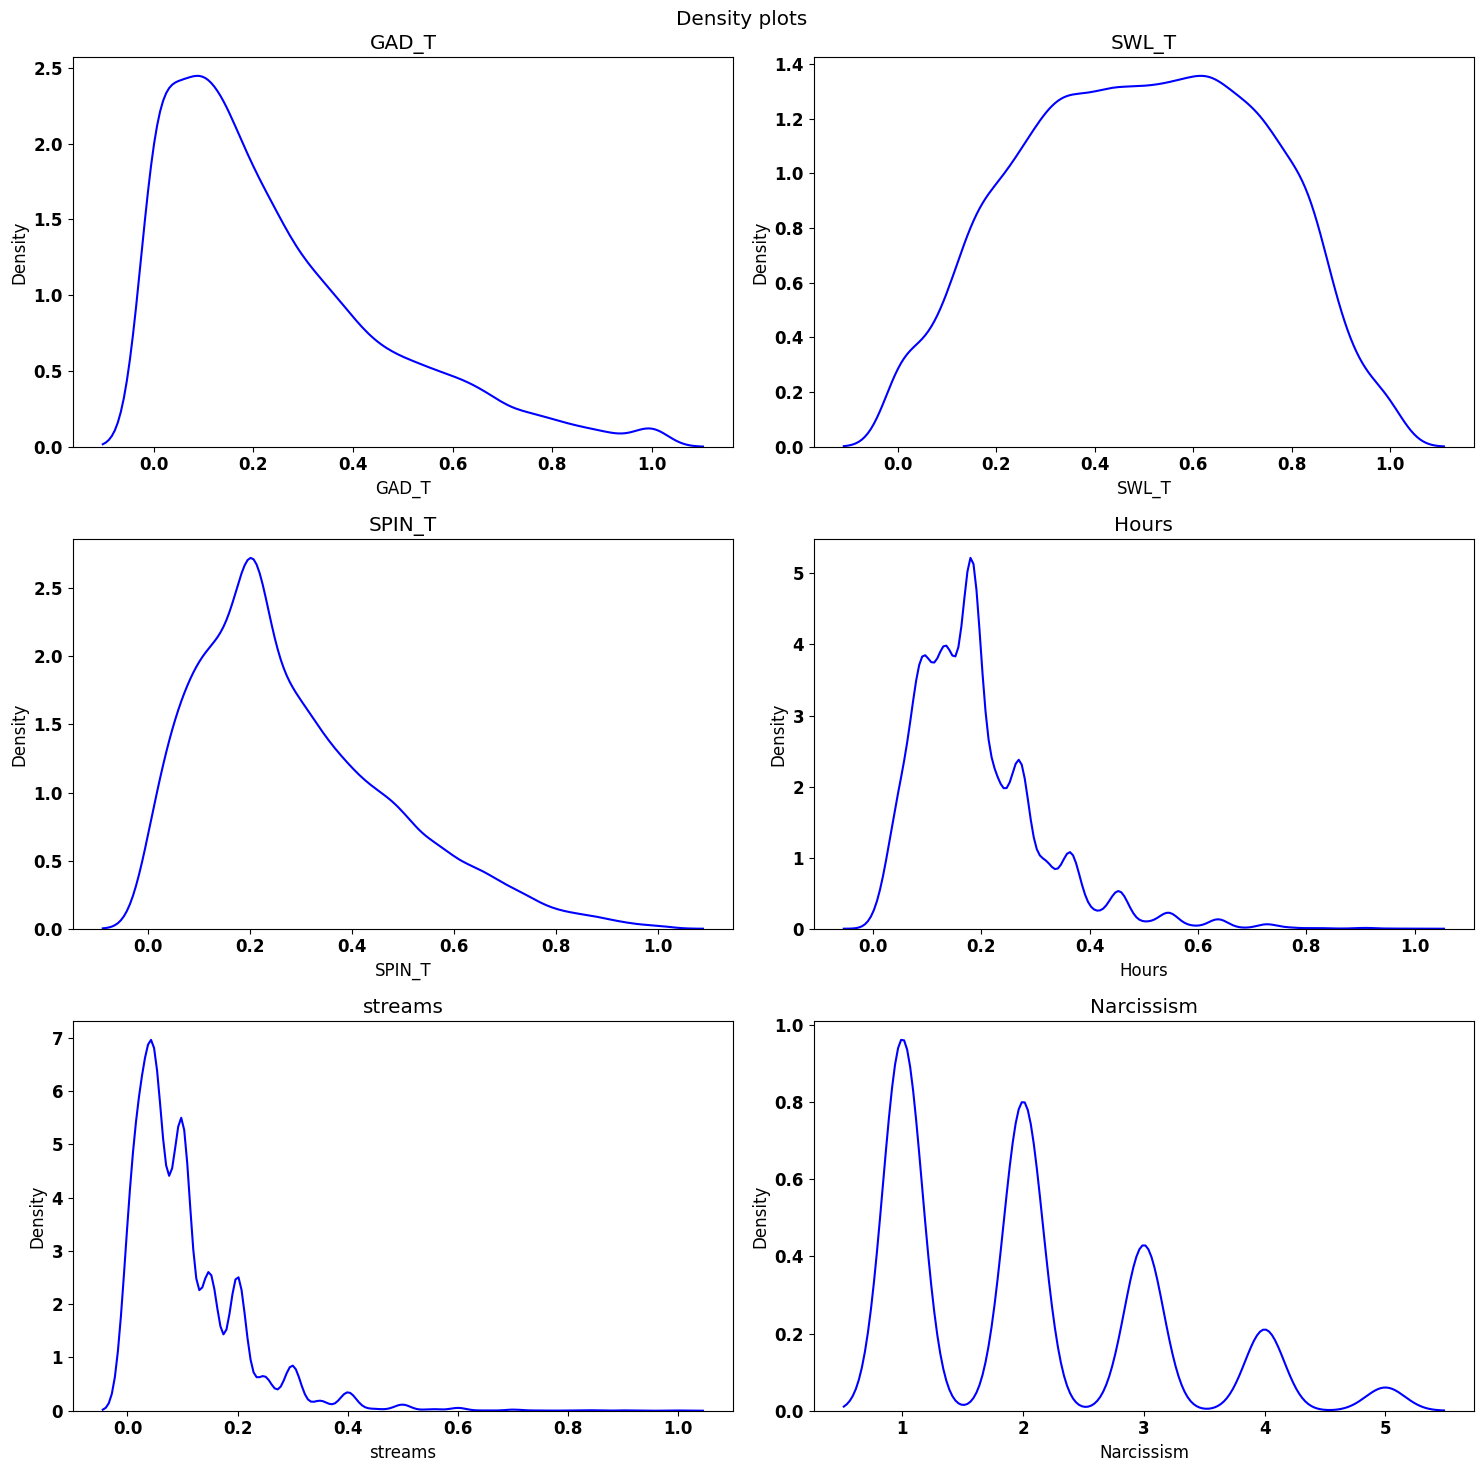

In [282]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

# Create subplots for density plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
# Columns to plot density distributions
columns_to_plot = ['GAD_T', 'SWL_T', 'SPIN_T', 'Hours', 'streams', 'Narcissism']
# Loop through columns and plot density distributions
for i, col_name in enumerate(columns_to_plot):
    sns.kdeplot(df[col_name], ax=axes[i], color='b')
    axes[i].set_title(col_name)

fig.suptitle('Density plots')
plt.tight_layout()
plt.show()

**Step 7: Line Plots for Anxiety vs Hours Played and Watched**

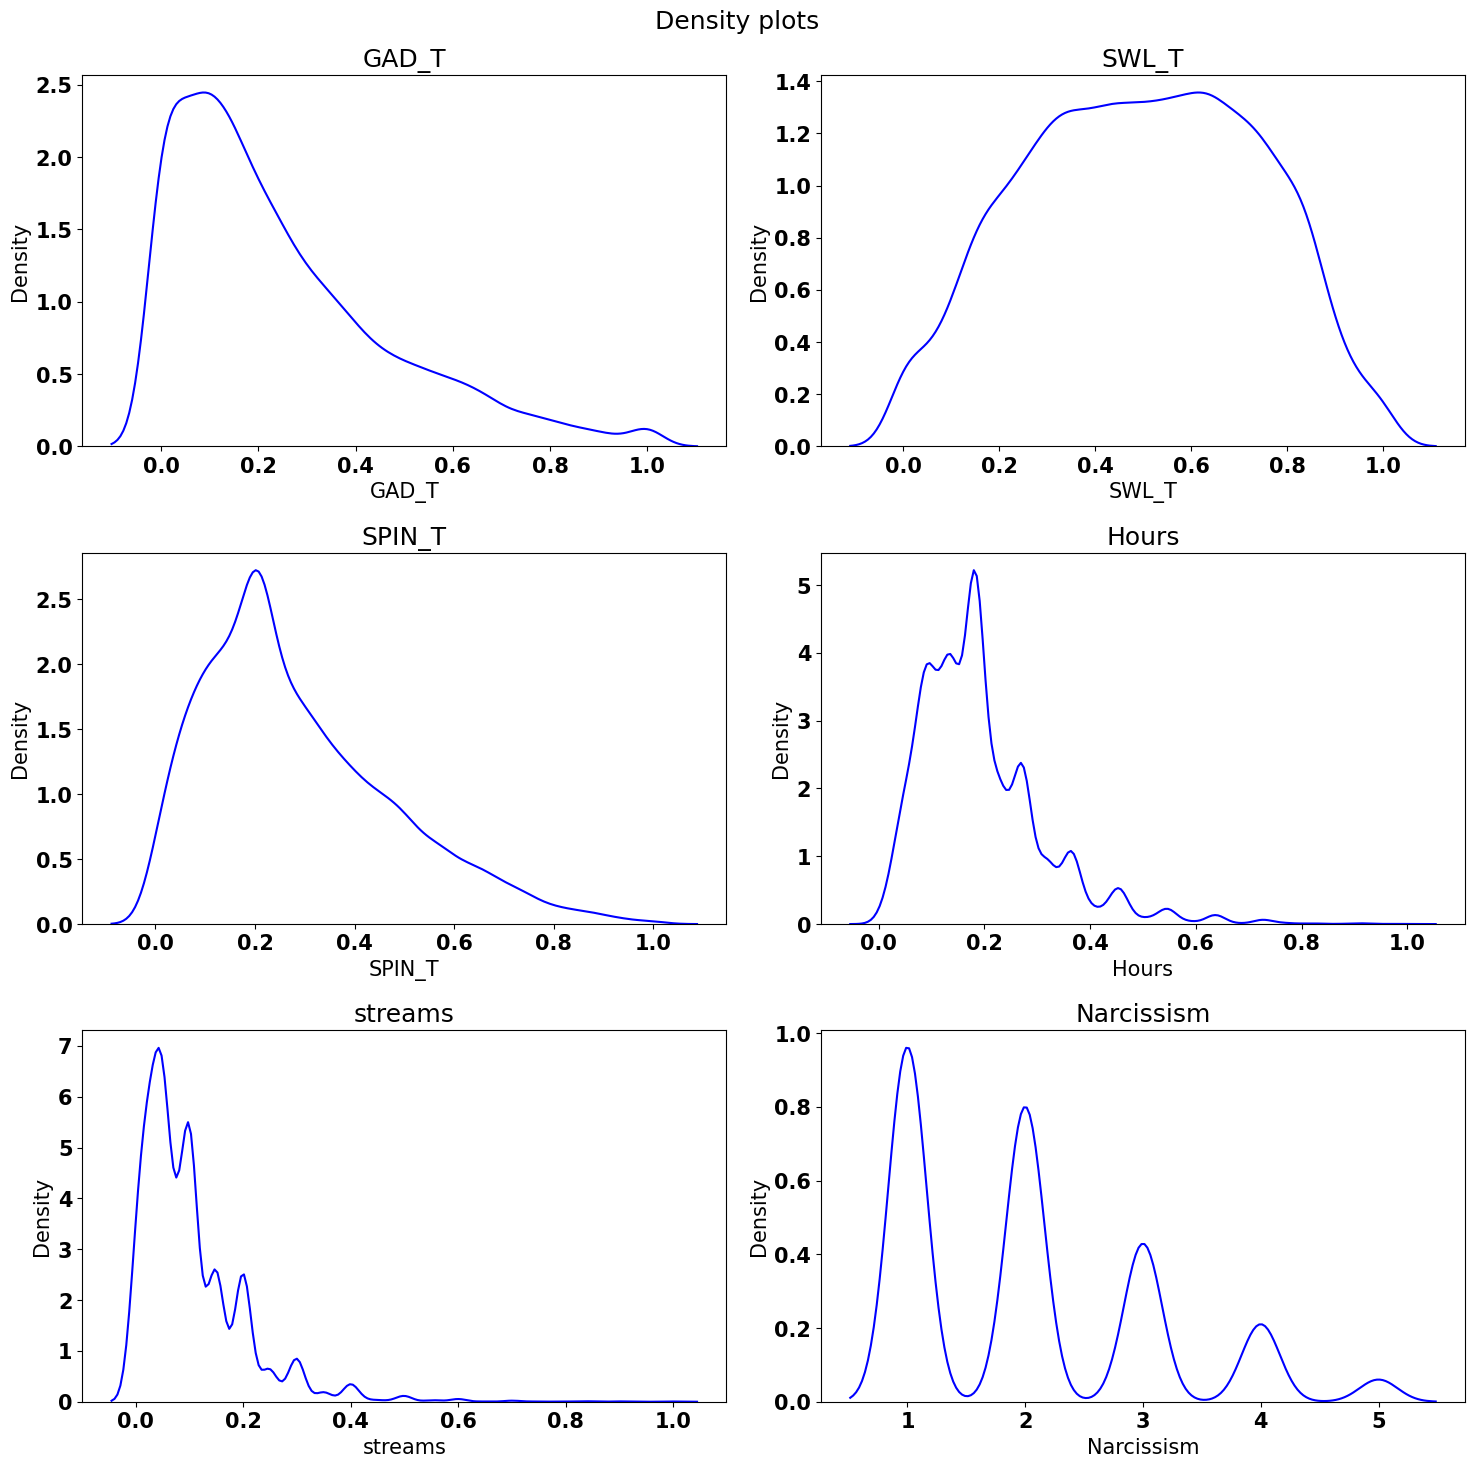

In [234]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

# Create subplots for line plots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
axes = ax.flatten()
columns_to_plot = ['GAD_T', 'SWL_T', 'SPIN_T', 'Hours', 'streams', 'Narcissism']

for i, col_name in enumerate(columns_to_plot):
    if i < len(axes):
        sns.kdeplot(df[col_name], ax=axes[i], color='b')
        axes[i].set_title(col_name)

fig.suptitle('Density plots')
plt.tight_layout()
plt.show()


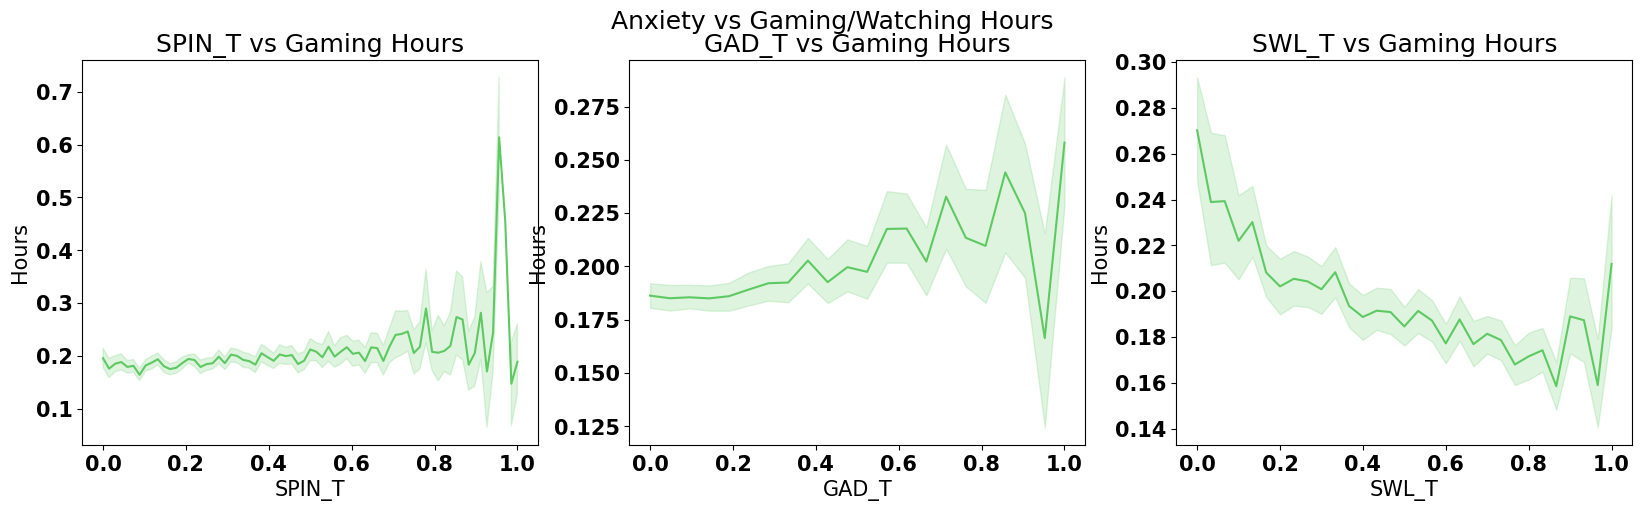

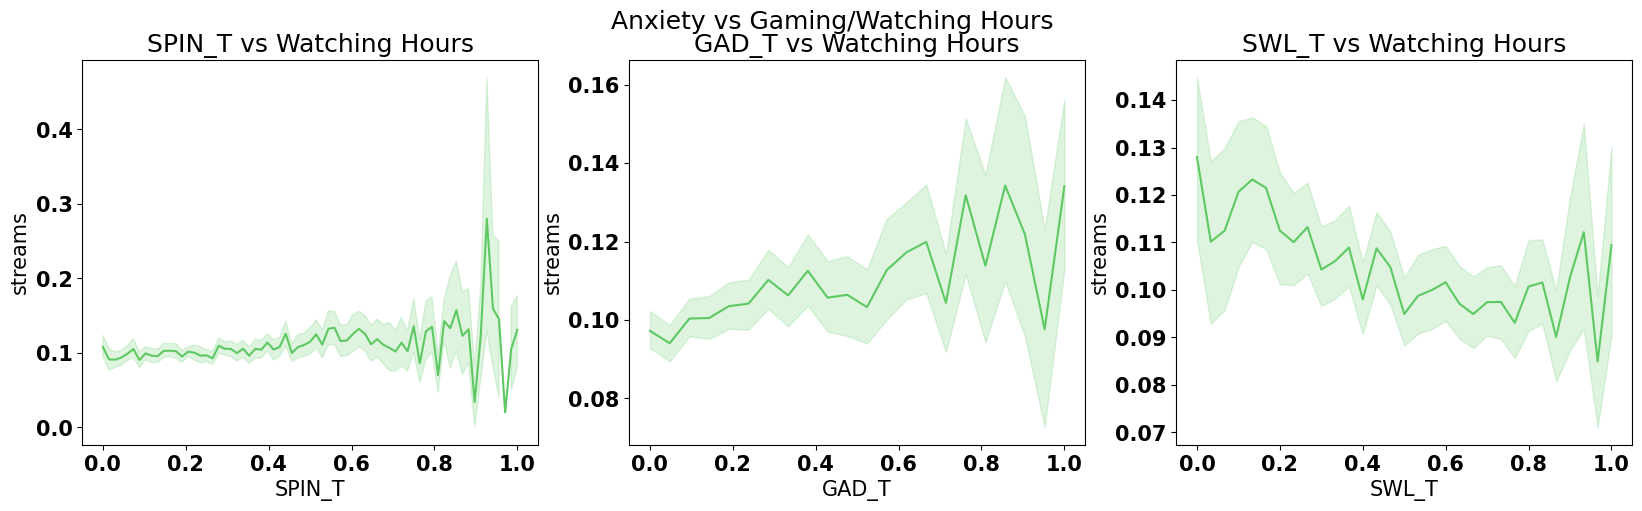

In [235]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

# Create subplots for line plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Anxiety vs Gaming/Watching Hours')
labels = ['SPIN_T', 'GAD_T', 'SWL_T']

# Loop through labels and plot line graphs for Gaming Hours
for count, ele in enumerate(labels):
    sns.lineplot(x=ele, y="Hours", data=df, ax=axes[count])
    axes[count].set_title(f"{ele} vs Gaming Hours")

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Anxiety vs Gaming/Watching Hours')

# Loop through labels and plot line graphs for Watching Hours
for count, ele in enumerate(labels):
    sns.lineplot(x=ele, y="streams", data=df, ax=axes[count])
    axes[count].set_title(f"{ele} vs Watching Hours")

plt.show()

**Step 8: Create Pie Charts**

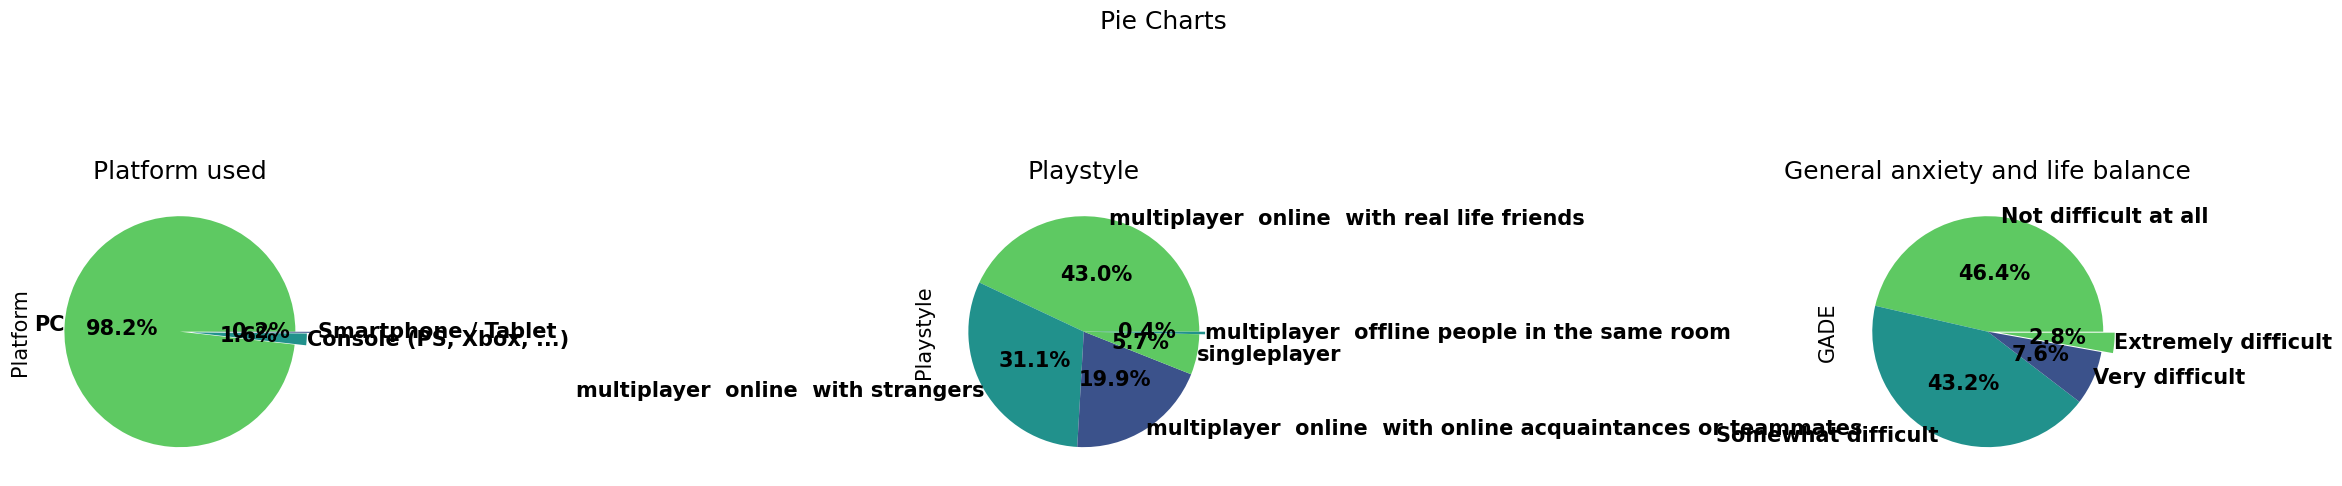

In [236]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

# Set a custom color palette (viridis in ascending order)
n_colors = 3  # Adjust the number of colors as needed
palette = sns.color_palette("viridis", n_colors)[::-1]
sns.set_palette(palette)

def create_pie_chart(data, title, explode=None, ax=None):
    myexplode = explode if explode else [0] * len(data)
    data.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.5, labeldistance=1, explode=myexplode, ax=ax)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(23, 6))
fig.suptitle('Pie Charts')

create_pie_chart(df['Platform'].value_counts(), 'Platform used', explode=[0, 0.1, 0.2], ax=axes[0])
create_pie_chart(df['Playstyle'].value_counts().head(5), 'Playstyle', explode=[0, 0, 0, 0, 0.05], ax=axes[1])
create_pie_chart(df['GADE'].value_counts().head(5), 'General anxiety and life balance', explode=[0, 0, 0, 0.1], ax=axes[2])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

**Step 9. Game vs Anxiety and Residence vs Anxiety**

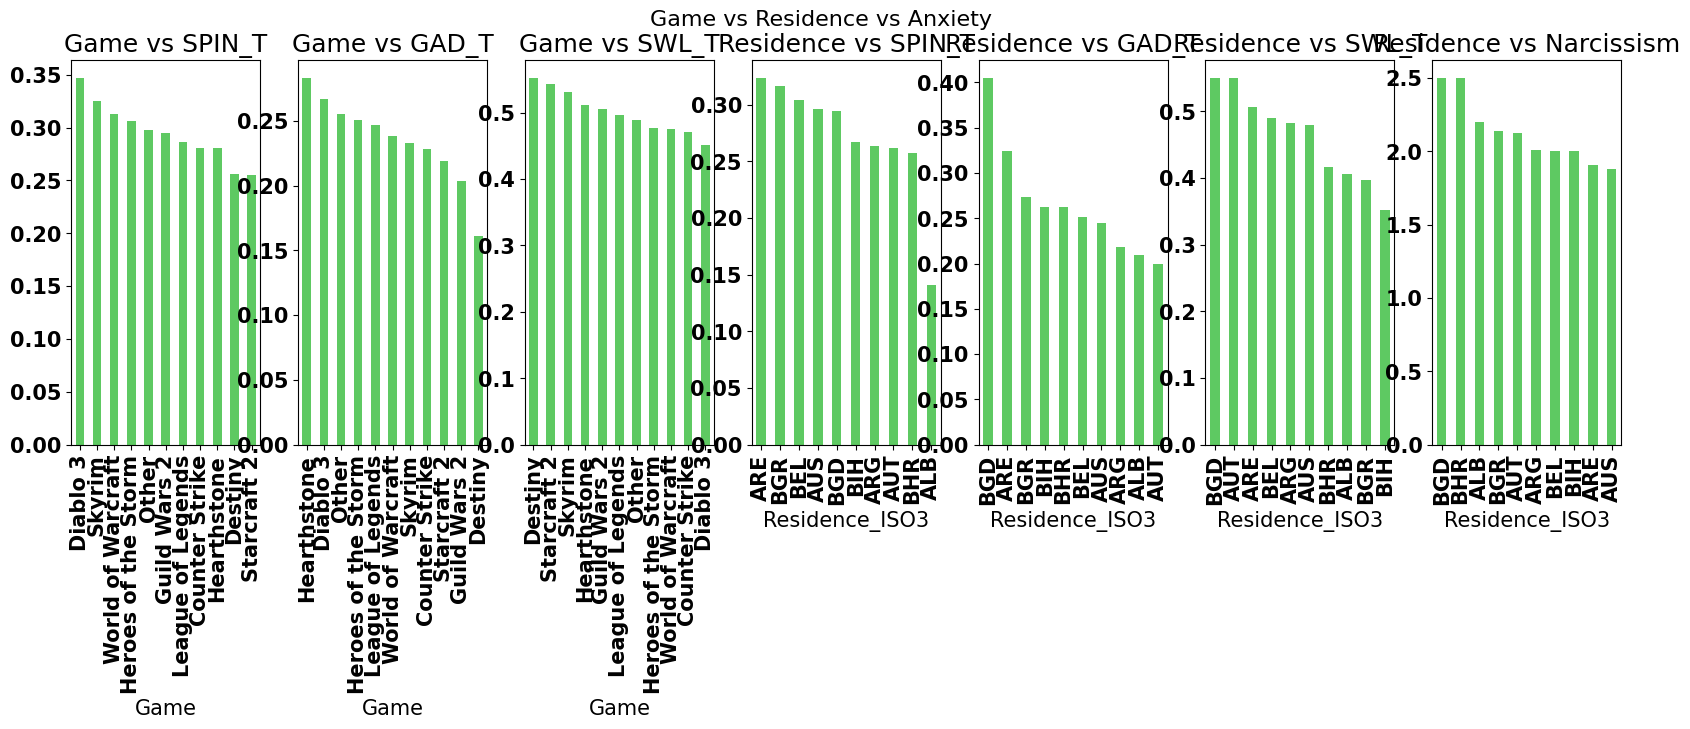

In [237]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

# Create subplots for Game vs Anxiety and Residence vs Anxiety
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
fig.suptitle('Game vs Residence vs Anxiety', fontsize=16)
labels = ['SPIN_T', 'GAD_T', 'SWL_T', 'Narcissism']

for count, ele in enumerate(labels[:-1]):
    df.groupby('Game')[ele].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[count])
    axes[count].set_title(f"Game vs {ele}")

for count, ele in enumerate(labels):
    df.groupby('Residence_ISO3')[ele].mean().head(10).sort_values(ascending=False).plot(kind='bar', ax=axes[count + 3])
    axes[count + 3].set_title(f"Residence vs {ele}")

**Step 10. Time-related EDA for Gaming Hours and Streams Hours**

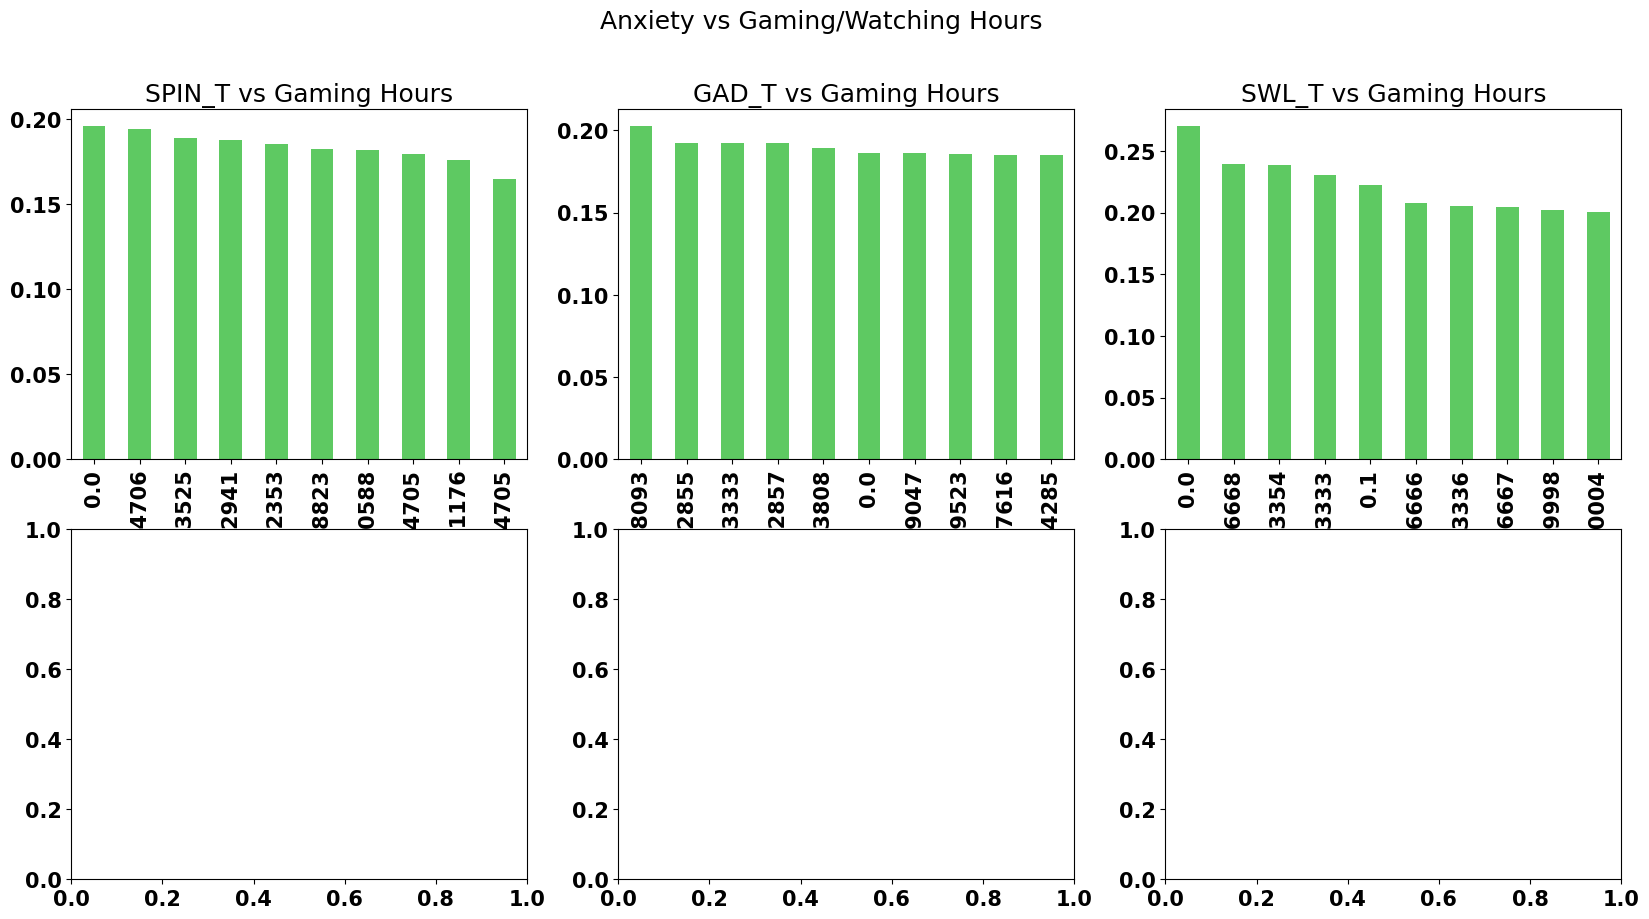

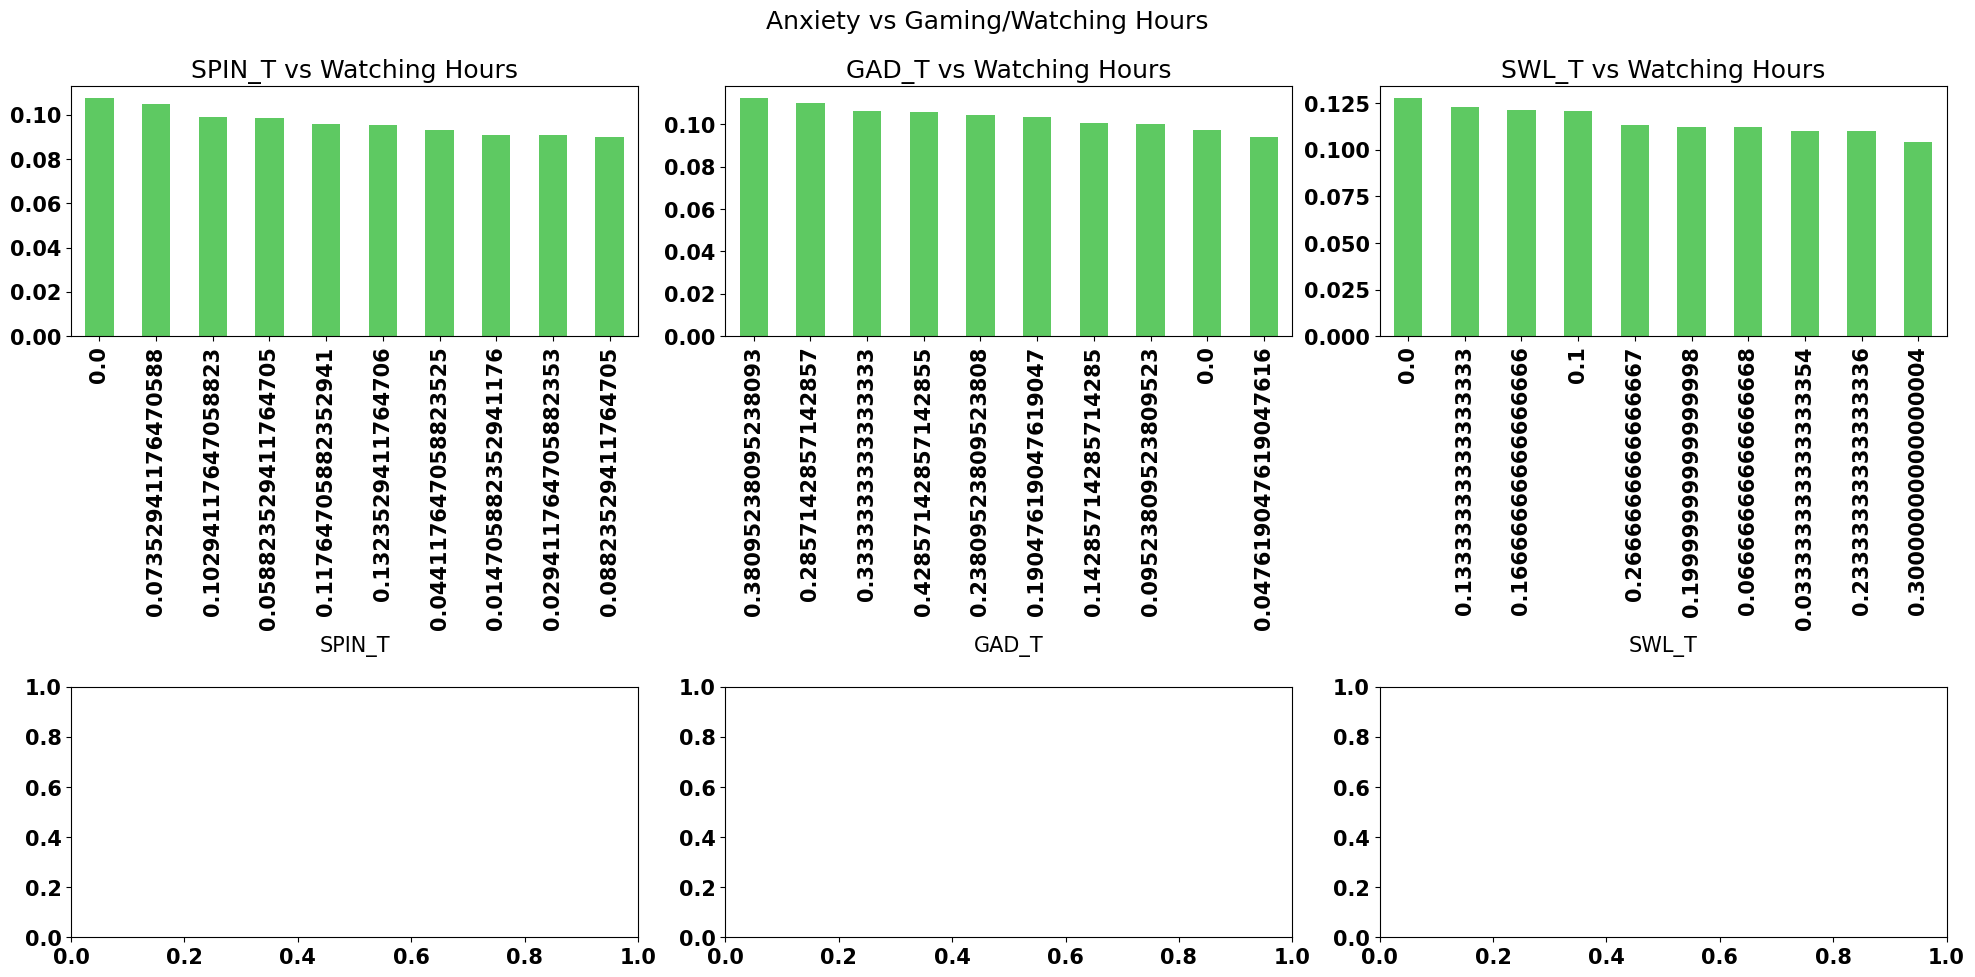

In [238]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

# Create subplots for line plots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Anxiety vs Gaming/Watching Hours')
labels = ['SPIN_T', 'GAD_T', 'SWL_T']

# Loop through labels and plot line graphs for Gaming Hours
for count, ele in enumerate(labels):
    row, col = count // 3, count % 3
    df.groupby(ele)['Hours'].mean().head(10).sort_values(ascending=False).plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f"{ele} vs Gaming Hours")

# Create subplots for line plots for Watching Hours
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Anxiety vs Gaming/Watching Hours')

for count, ele in enumerate(labels):
    row, col = count // 3, count % 3
    df.groupby(ele)['streams'].mean().head(10).sort_values(ascending=False).plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f"{ele} vs Watching Hours")

plt.tight_layout()
plt.show()

**Step 11. Gender-Based Analysis**

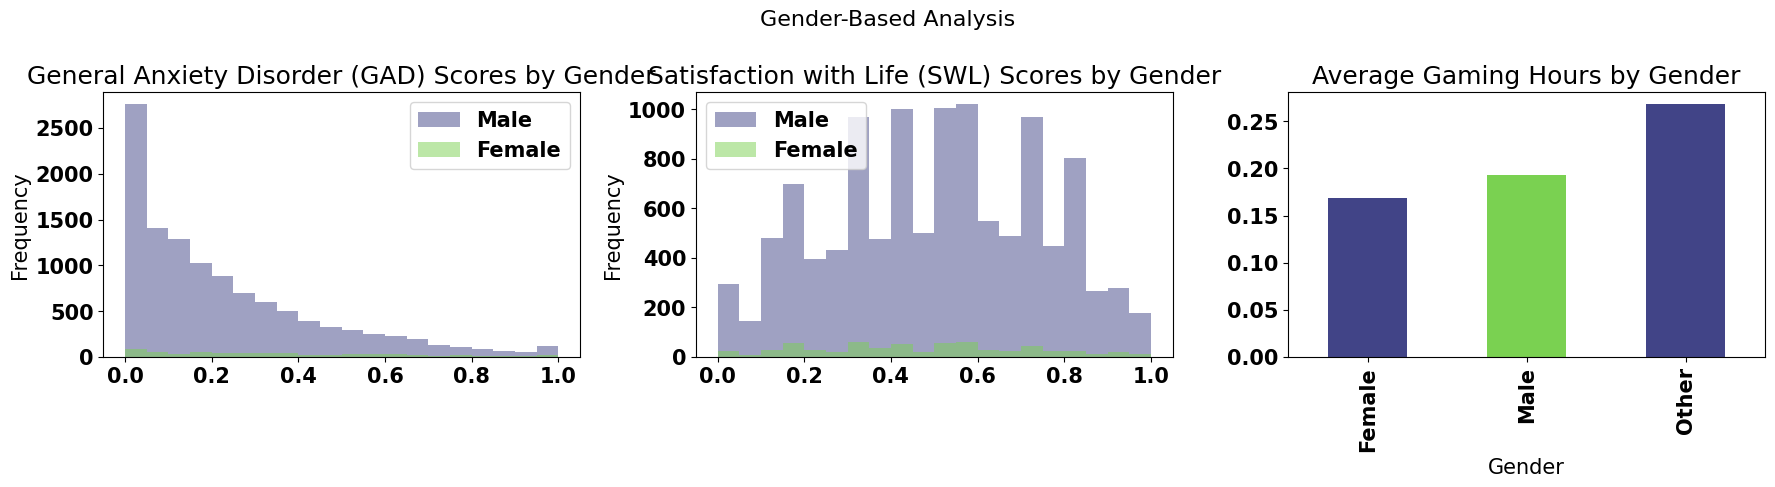

In [239]:
import matplotlib.cm as cm

# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Gender-Based Analysis', fontsize=16)

# Define the viridis colormap
viridis = cm.get_cmap('viridis')

# Plot histograms of mental disorder scores by gender
df[df['Gender'] == 'Male']['GAD_T'].plot.hist(ax=axes[0], bins=20, alpha=0.5, label='Male', color=viridis(0.2))
df[df['Gender'] == 'Female']['GAD_T'].plot.hist(ax=axes[0], bins=20, alpha=0.5, label='Female', color=viridis(0.8))
axes[0].set_title('General Anxiety Disorder (GAD) Scores by Gender')
axes[0].legend()

df[df['Gender'] == 'Male']['SWL_T'].plot.hist(ax=axes[1], bins=20, alpha=0.5, label='Male', color=viridis(0.2))
df[df['Gender'] == 'Female']['SWL_T'].plot.hist(ax=axes[1], bins=20, alpha=0.5, label='Female', color=viridis(0.8))
axes[1].set_title('Satisfaction with Life (SWL) Scores by Gender')
axes[1].legend()

# Compare average gaming hours by gender
df.groupby('Gender')['Hours'].mean().plot.bar(ax=axes[2], color=[viridis(0.2), viridis(0.8)])
axes[2].set_title('Average Gaming Hours by Gender')

plt.tight_layout()
plt.show()

**Step 12. Educational Background Analysis**

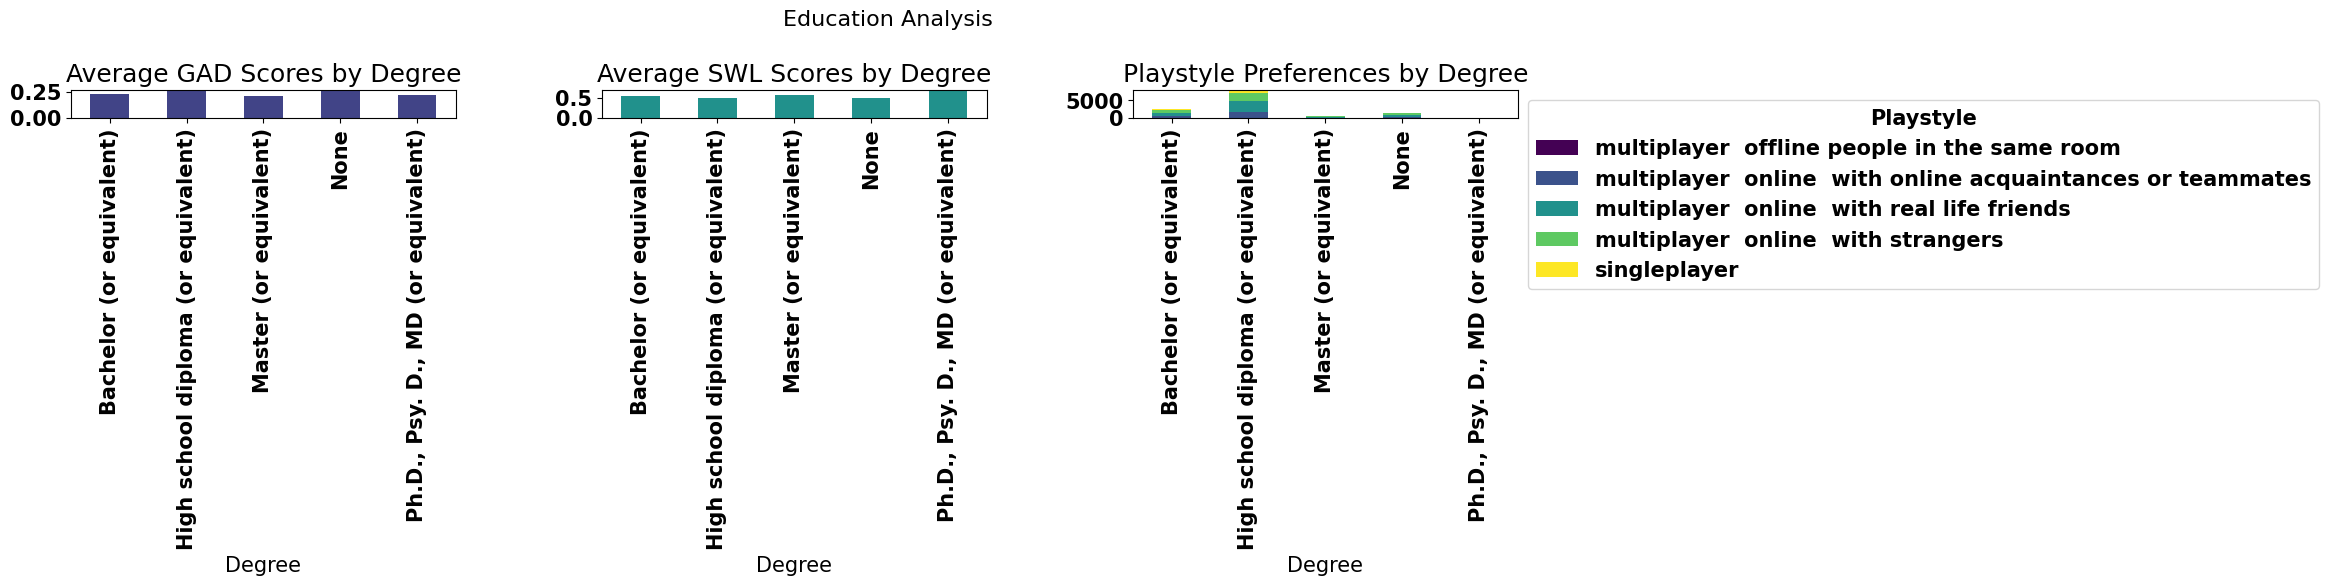

In [240]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Education Analysis', fontsize=16)

# Define the viridis colormap
viridis = cm.get_cmap('viridis')

# Visualize mental disorder scores by educational degree
df.groupby('Degree')['GAD_T'].mean().plot.bar(ax=axes[0], color=viridis(0.2))
axes[0].set_title('Average GAD Scores by Degree')

df.groupby('Degree')['SWL_T'].mean().plot.bar(ax=axes[1], color=viridis(0.5))
axes[1].set_title('Average SWL Scores by Degree')

# Compare playstyle preferences among different degrees
degree_playstyle = df.groupby('Degree')['Playstyle'].value_counts().unstack().fillna(0)
degree_playstyle.plot.bar(stacked=True, ax=axes[2], colormap='viridis')
axes[2].set_title('Playstyle Preferences by Degree')
axes[2].legend(title='Playstyle', loc='upper left')

# Move the legend outside the plot area
axes[2].legend(title='Playstyle', loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

**Step 13. Work Status Analysis**

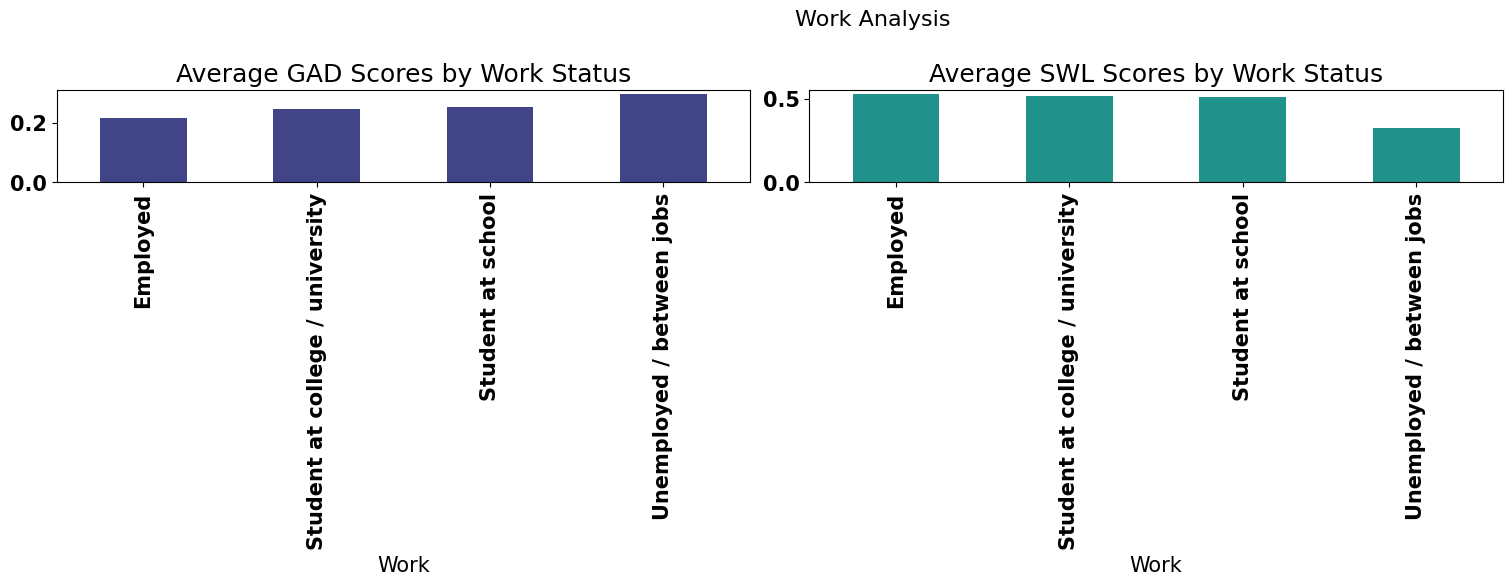

In [241]:
# Set font family to 'sans-serif' to avoid font errors
plt.rcParams['font.family'] = 'sans-serif'

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Work Analysis', fontsize=16)

# Define the viridis colormap
viridis = cm.get_cmap('viridis')

# Visualize mental disorder scores by work status
df.groupby('Work')['GAD_T'].mean().plot.bar(ax=axes[0], color=viridis(0.2))
axes[0].set_title('Average GAD Scores by Work Status')

df.groupby('Work')['SWL_T'].mean().plot.bar(ax=axes[1], color=viridis(0.5))
axes[1].set_title('Average SWL Scores by Work Status')

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

**Step 14. Region-Based Analysis**

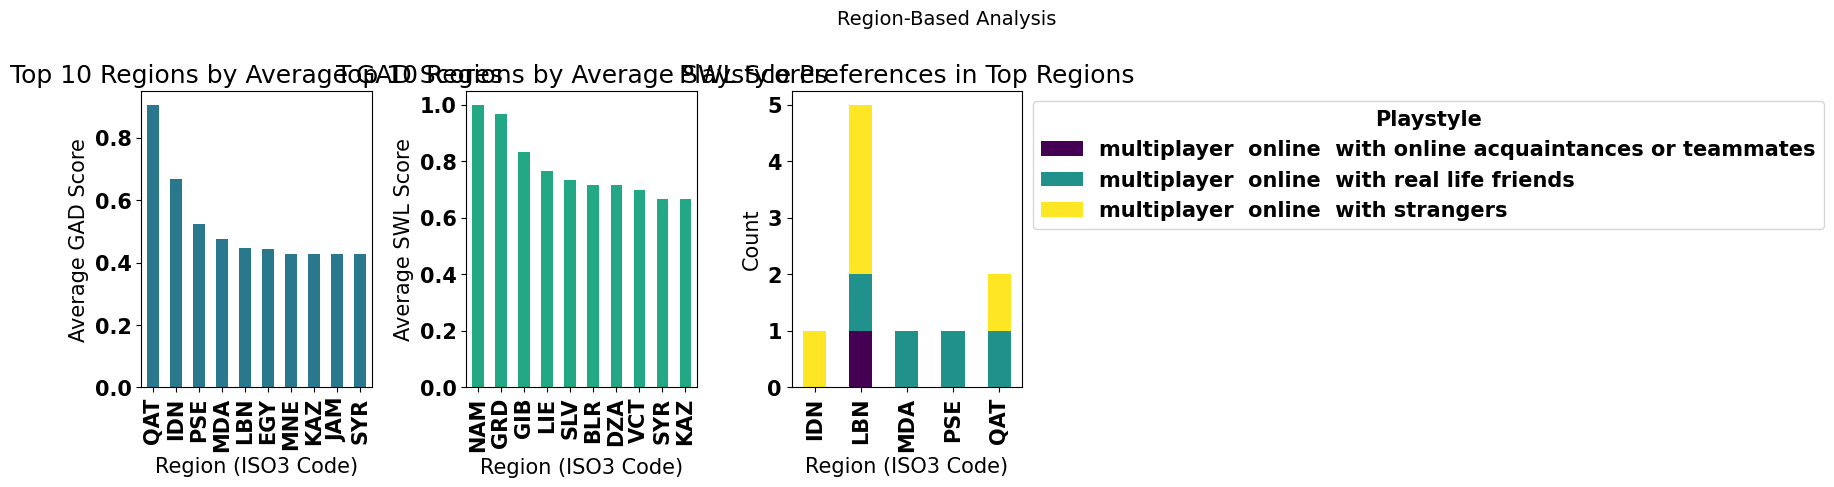

In [242]:
# Set font family to 'sans-serif', reduce title size
plt.rcParams['font.family'] = 'sans-serif'

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Region-Based Analysis', fontsize=14)  # Reduced title size

# Define the viridis colormap
viridis = cm.get_cmap('viridis')

# Visualize mental disorder scores by residence region
df['Residence_ISO3'].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown'
df.groupby('Residence_ISO3')['GAD_T'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axes[0], color=viridis(0.4))
axes[0].set_title('Top 10 Regions by Average GAD Scores')
axes[0].set_xlabel('Region (ISO3 Code)')
axes[0].set_ylabel('Average GAD Score')

df.groupby('Residence_ISO3')['SWL_T'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axes[1], color=viridis(0.6))
axes[1].set_title('Top 10 Regions by Average SWL Scores')
axes[1].set_xlabel('Region (ISO3 Code)')
axes[1].set_ylabel('Average SWL Score')

# Compare playstyle preferences in top regions
top_regions = df.groupby('Residence_ISO3')['GAD_T'].mean().sort_values(ascending=False).head(5).index
region_playstyle = df[df['Residence_ISO3'].isin(top_regions)].groupby('Residence_ISO3')['Playstyle'].value_counts().unstack().fillna(0)
region_playstyle.plot.bar(stacked=True, ax=axes[2], colormap='viridis')  # Use colormap parameter
axes[2].set_title('Playstyle Preferences in Top Regions')
axes[2].set_xlabel('Region (ISO3 Code)')
axes[2].set_ylabel('Count')

# Move the legend outside the plot area
axes[2].legend(title='Playstyle', loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

**Label Encoding**

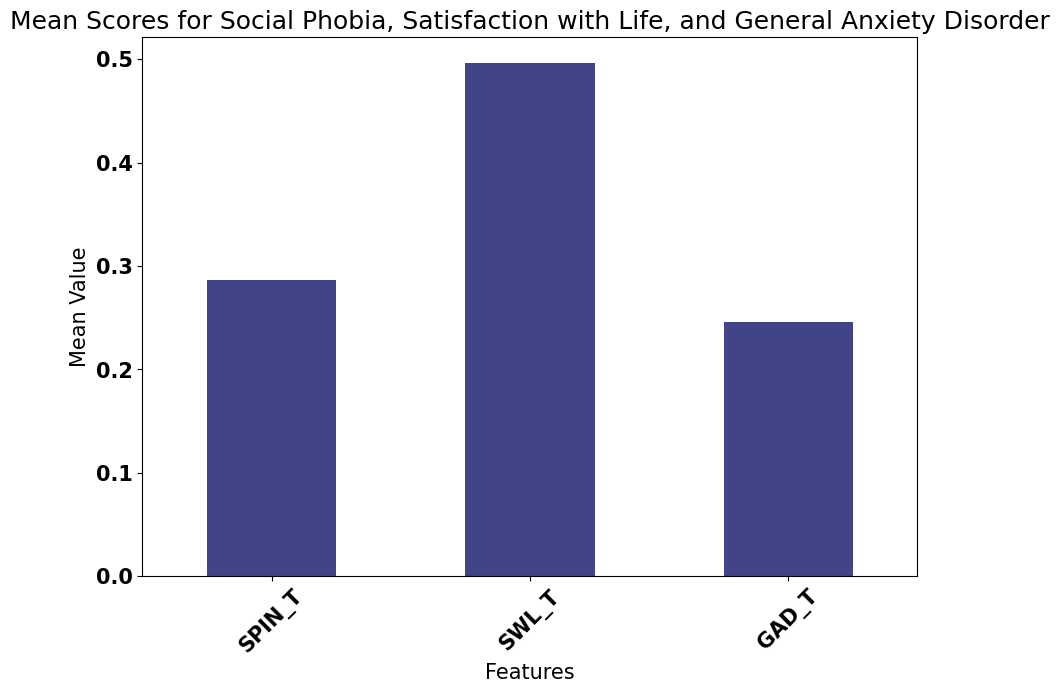

In [243]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Calculate mean values for the specified features
mean_values = df[['SPIN_T', 'SWL_T', 'GAD_T']].mean()

# Define the viridis colormap
viridis = cm.get_cmap('viridis')

# Create a bar chart to visualize the mean values
plt.figure(figsize=(10, 7))
mean_values.plot(kind='bar', color=viridis(0.2), width=0.5)
plt.title('Mean Scores for Social Phobia, Satisfaction with Life, and General Anxiety Disorder')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

In [244]:
# Initialize the label encoder
le = LabelEncoder()

# Perform label encoding for object-type columns
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])

# Now, your categorical features have been label-encoded in the DataFrame.

**Feature Engineering**

Let's better understand the relationships and dependencies between different numerical features in this dataset

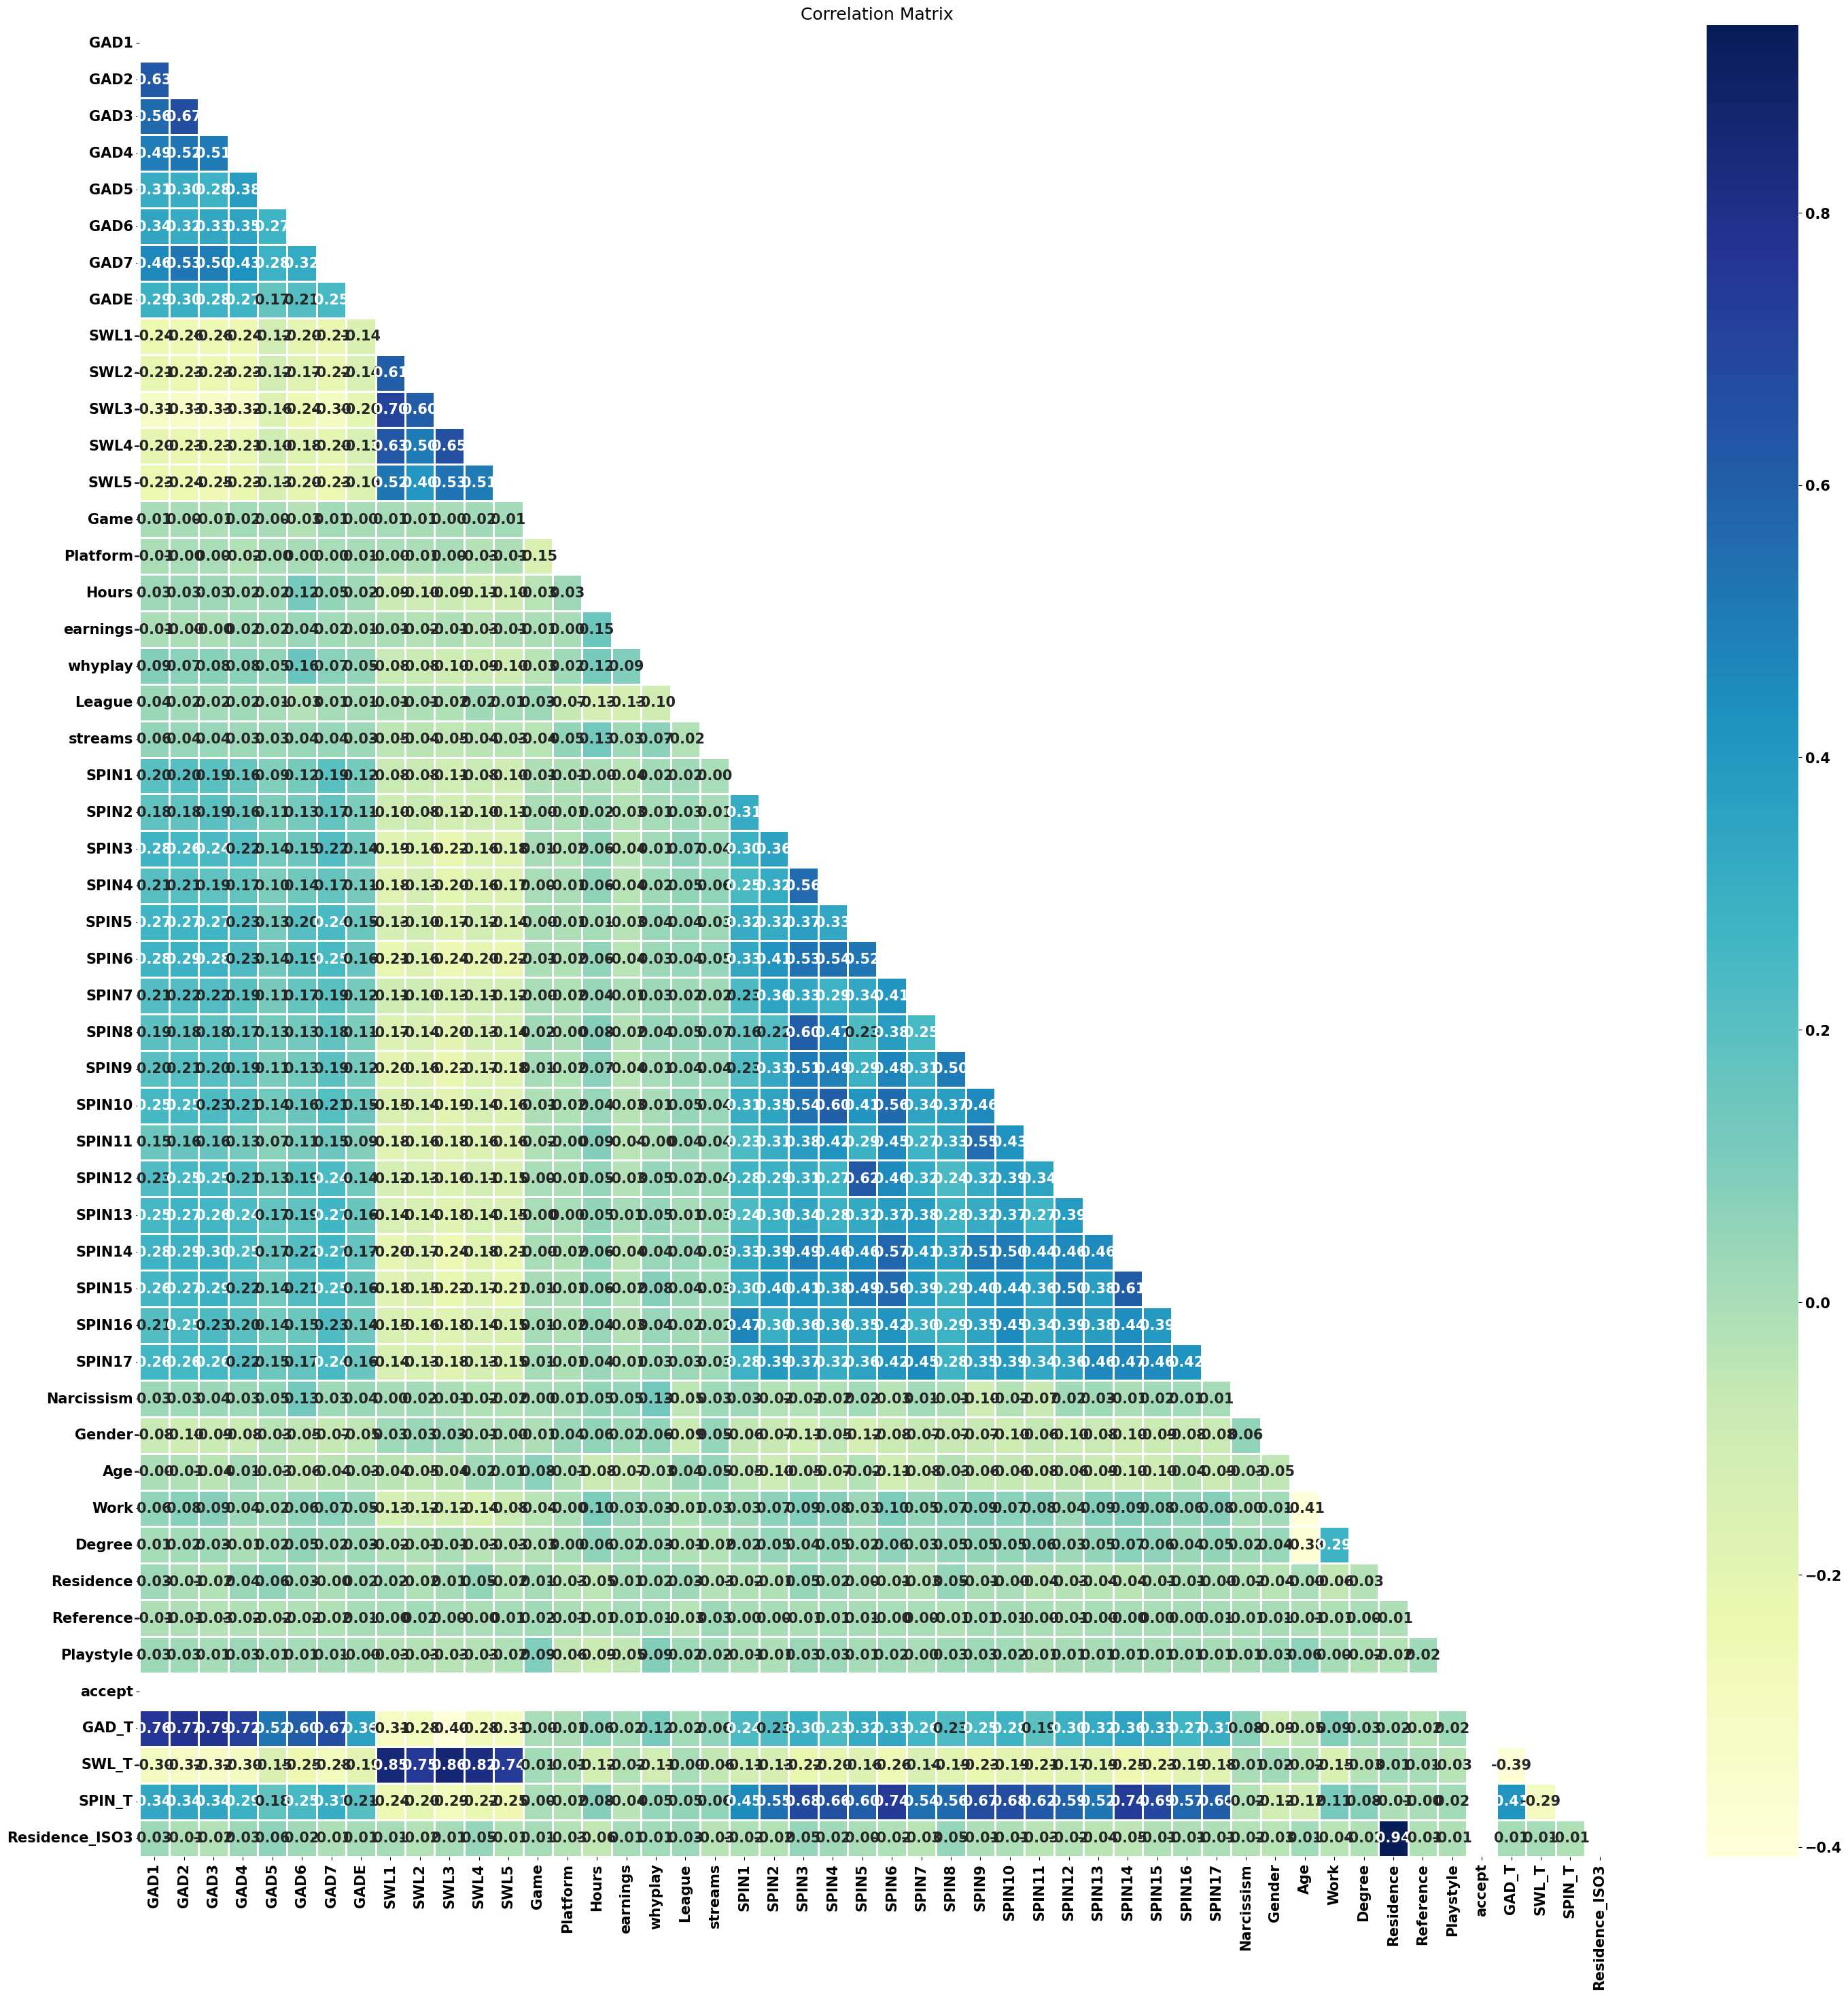

In [245]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

Let's select a subset of features (`GAD_T`, `SWL_T`, `SPIN_T`) and select another subset of features (`Age`, `Hours`, `streams`)that are likely to be used as predictor variables

In [247]:
df1 = df[['GAD_T','SWL_T','SPIN_T' ]]
df2 = df[[ 'Age','Hours','streams' ]]

Initializes two PCA (Principal Component Analysis) objects with the number of components set to 2.

In [248]:
pc1 = PCA(n_components=2)
pc2 = PCA(n_components=2)

Apply PCA to the selected feature subsets reducing them to 2 principle components each.

In [249]:
x1 = pc1.fit_transform(df1)
x2 = pc2.fit_transform(df2)

Combines the reduced feature sets obtained from PCA into a single feature set `x`.

In [250]:
x = x1 + x2

### **Elbow Method**

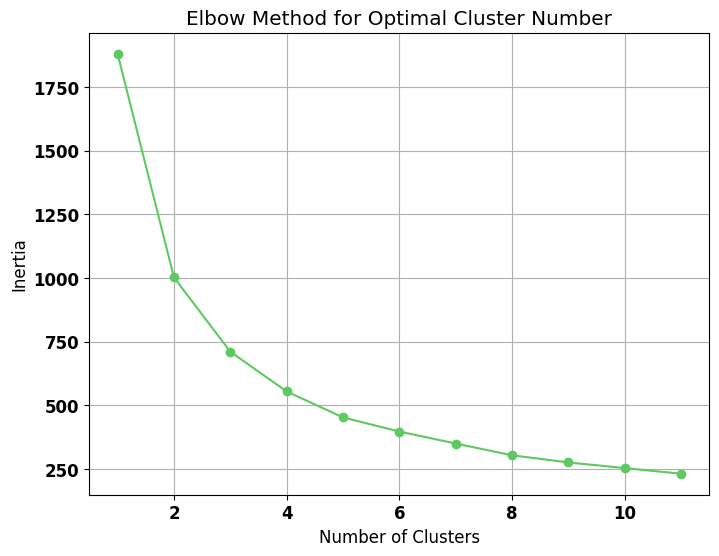

In [281]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize an empty list to store the inertia values)
inertia_values = []

# Define the range of cluster numbers to try
for num_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Cluster Number")
plt.grid(True)

# Display the elbow plot
plt.show()


### **K-Means Clustering**

In [252]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 40, random_state = 0)
y_clusters = model.fit_predict(x)

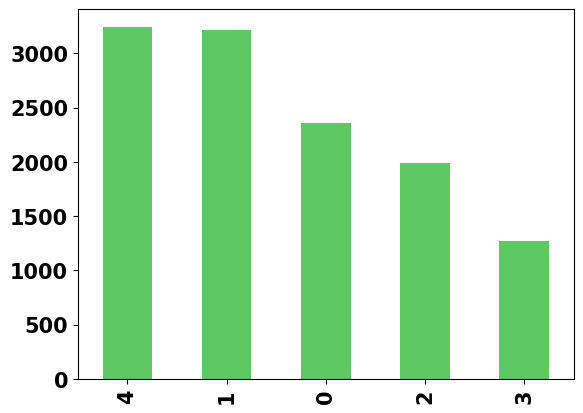

In [253]:
pd.Series(y_clusters).value_counts().plot(kind='bar');

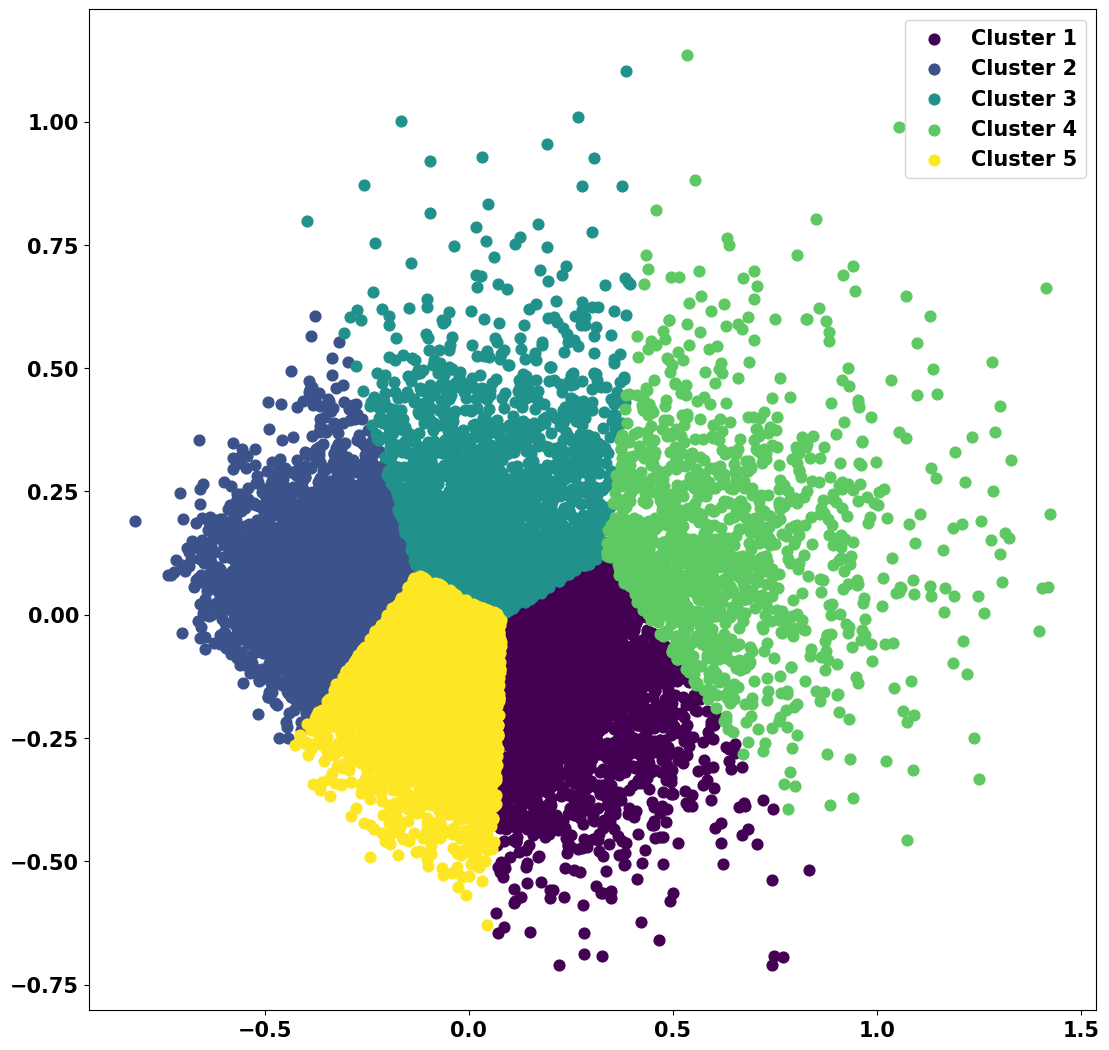

In [254]:
plt.figure(figsize=(13, 13))
viridis = cm.get_cmap('viridis', 5)  # Create a colormap with 5 colors

for cluster_number in range(5):
    plt.scatter(x[y_clusters == cluster_number, 0],
                x[y_clusters == cluster_number, 1],
                s=60, c=viridis(cluster_number),
                label=f'Cluster {cluster_number + 1}')

plt.legend()
plt.show()

**Adding label column to train our model and predict which group you are**

In [255]:
df['Label'] = y_clusters

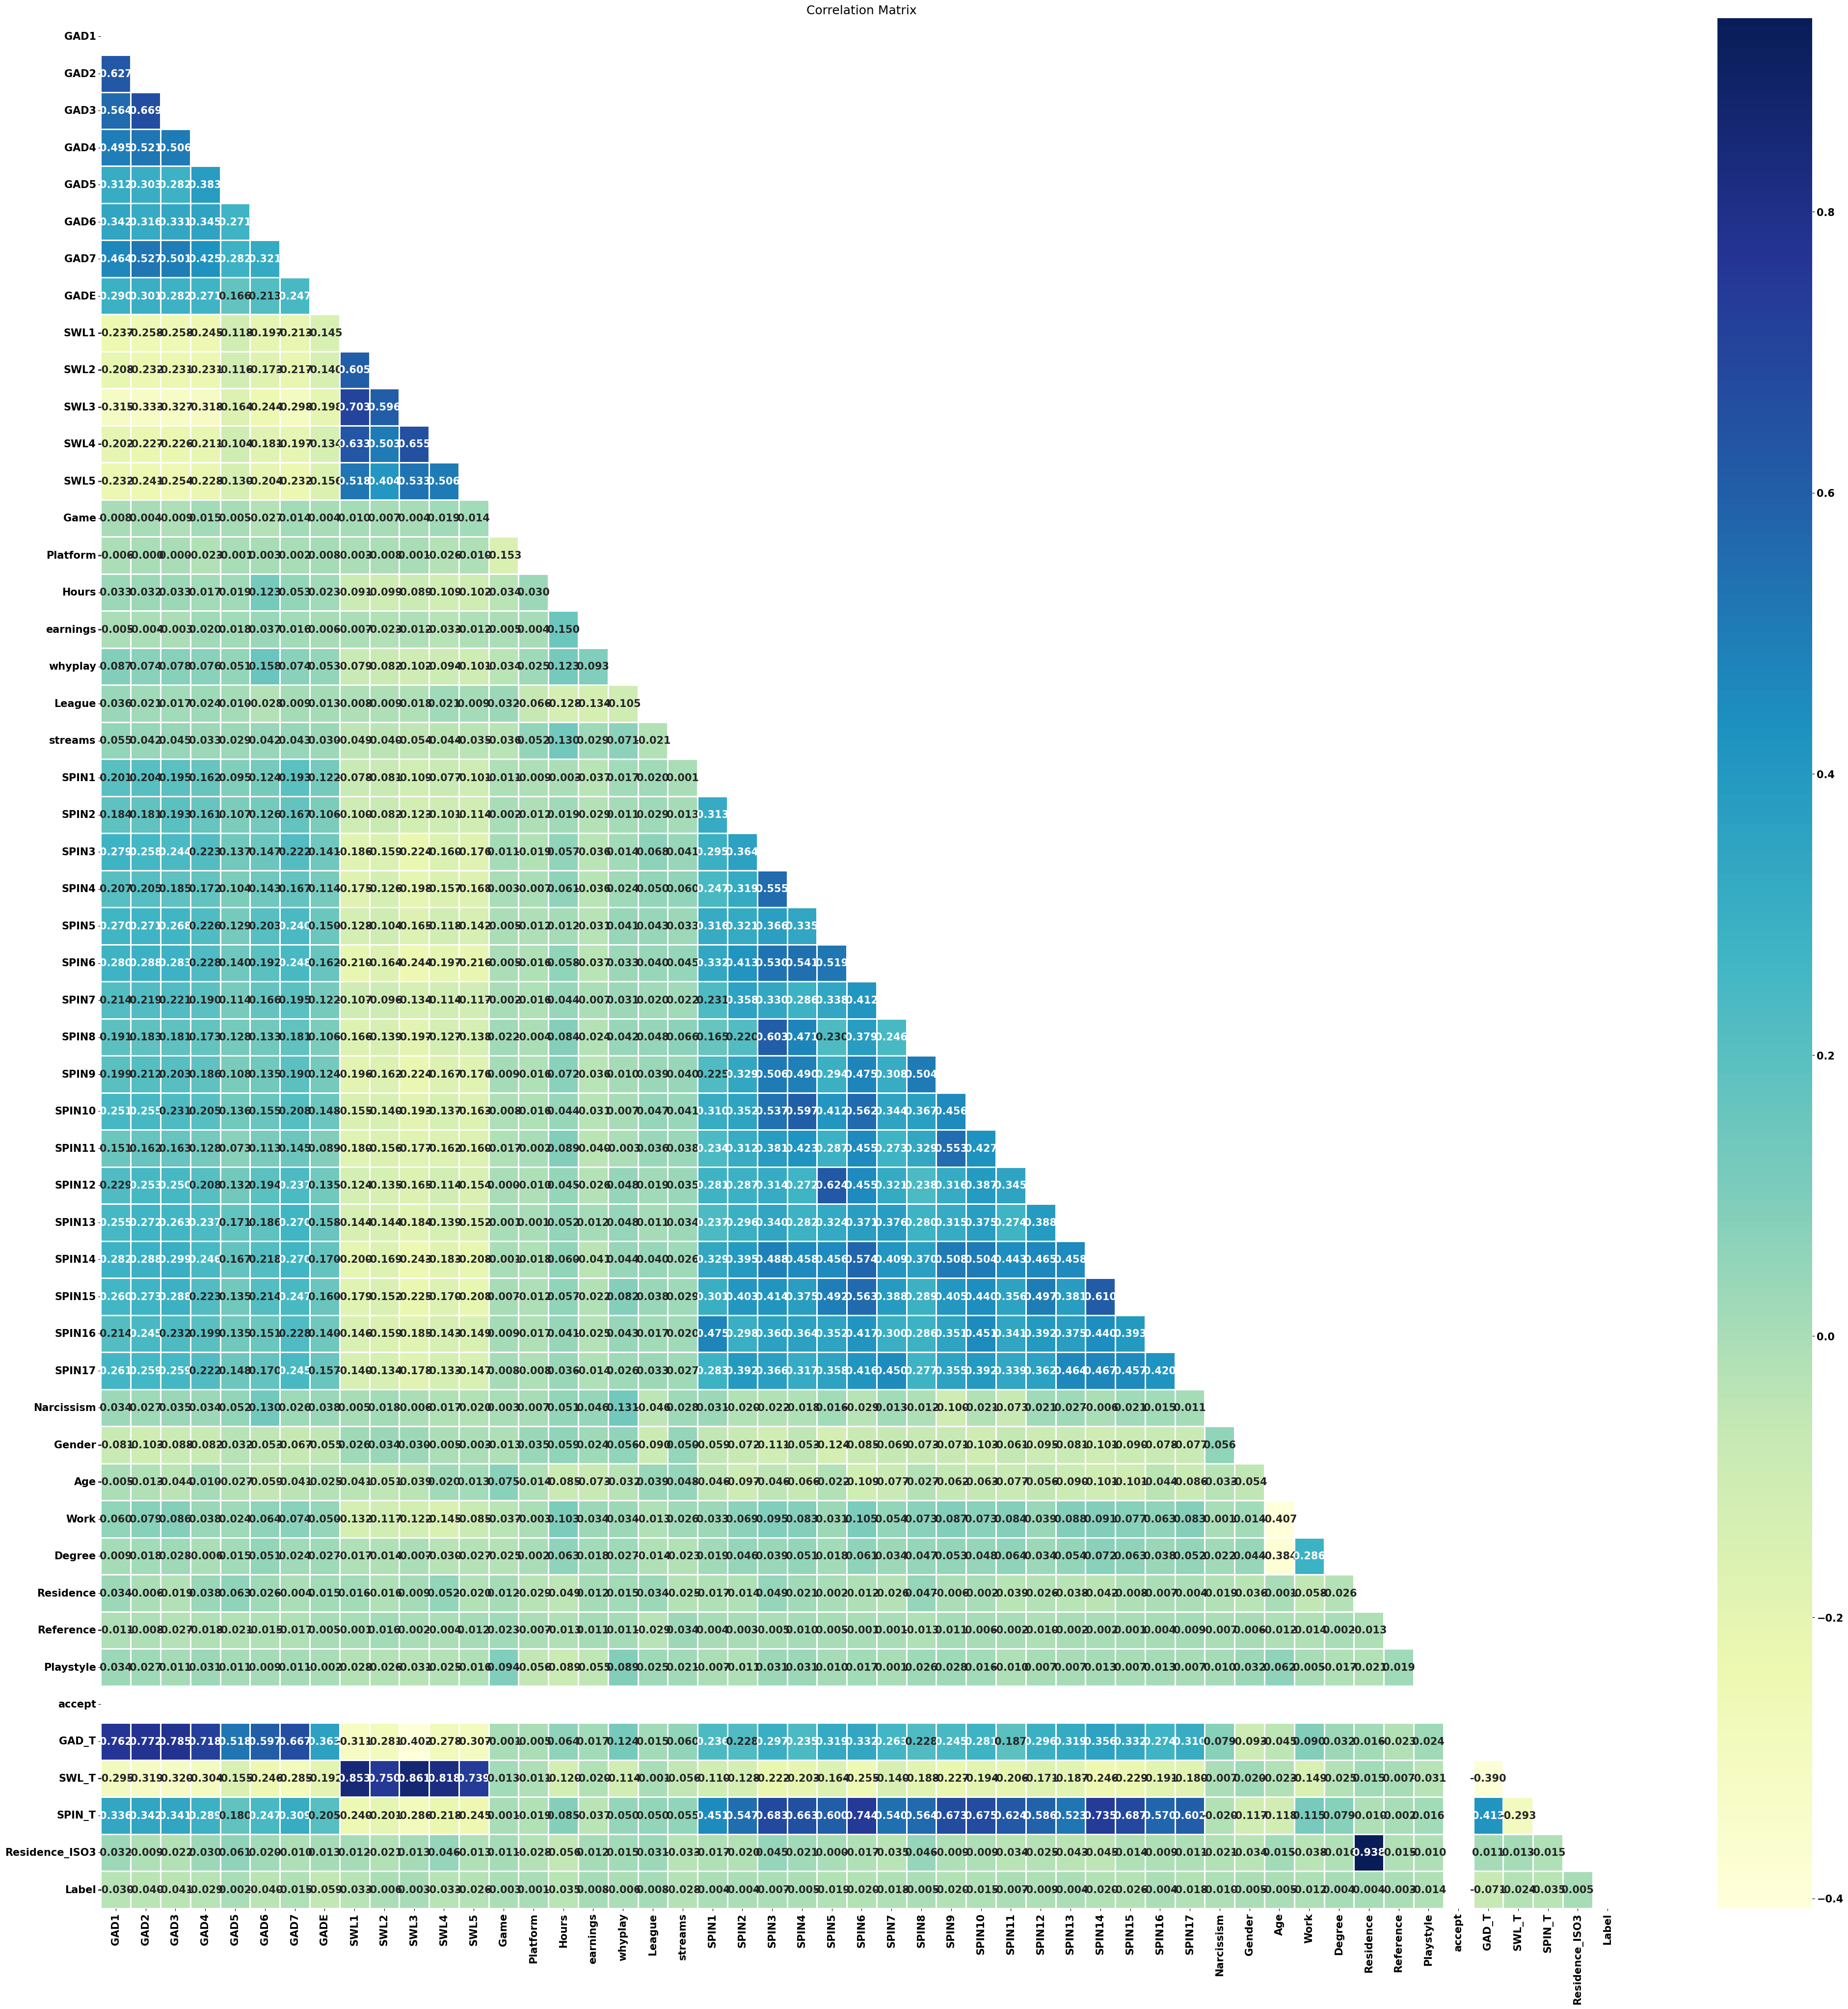

In [256]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (50, 50))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".3f")
cormat.set_title('Correlation Matrix')
plt.show()

**Imbalanced Dataset**

In [257]:
plt.rcParams.update({'font.size': 12})

In [258]:
df['Label'].value_counts()

4    3245
1    3215
0    2360
2    1992
3    1269
Name: Label, dtype: int64

In [259]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

**Splitting data to train and test sets**

In [260]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=.8,random_state=44)

**Clustered Groups**

Let's confirm which cluster group has the highest score for psychological conditions such as psychology like GAD (General Anxiety Disorder), SWL (Satisfaction with Life) an and SPIN (Social Phobia Inventory) scores

In [261]:
# Define the viridis colormap
viridis = cm.get_cmap('viridis')

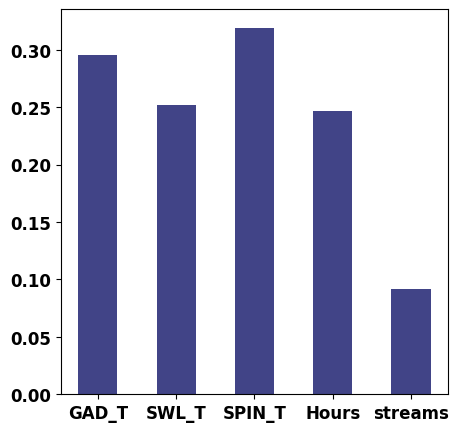

In [262]:
l1 = df[df['Label'] == 0]['GAD_T'].mean()
l2 = df[df['Label'] == 0]['SWL_T'].mean()
l3 = df[df['Label'] == 0]['SPIN_T'].mean()
l4 = df[df['Label'] == 0]['Hours'].mean()
l5 = df[df['Label'] == 0]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color = viridis(0.2),width = 0.5)
plt.show()

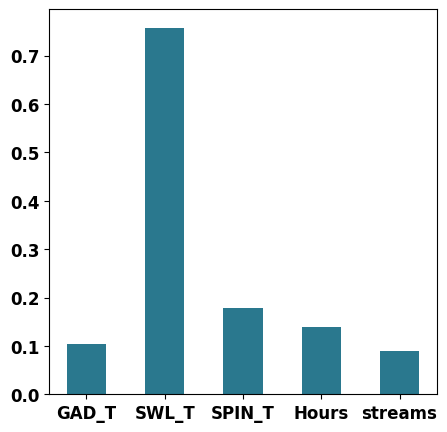

In [263]:
l1 = df[df['Label'] == 1]['GAD_T'].mean()
l2 = df[df['Label'] == 1]['SWL_T'].mean()
l3 = df[df['Label'] == 1]['SPIN_T'].mean()
l4 = df[df['Label'] == 1]['Hours'].mean()
l5 = df[df['Label'] == 1]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color =viridis(0.4),width = 0.5)
plt.show()

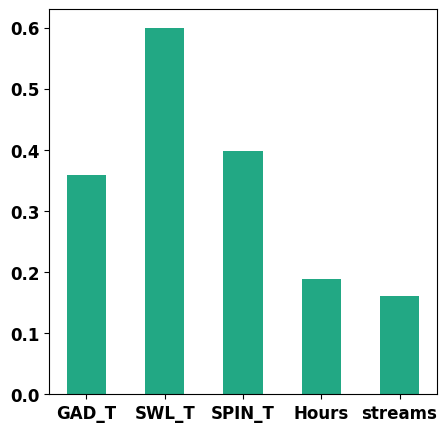

In [264]:
l1 = df[df['Label'] == 2]['GAD_T'].mean()
l2 = df[df['Label'] == 2]['SWL_T'].mean()
l3 = df[df['Label'] == 2]['SPIN_T'].mean()
l4 = df[df['Label'] == 2]['Hours'].mean()
l5 = df[df['Label'] == 2]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color =viridis(0.6),width = 0.5)
plt.show()

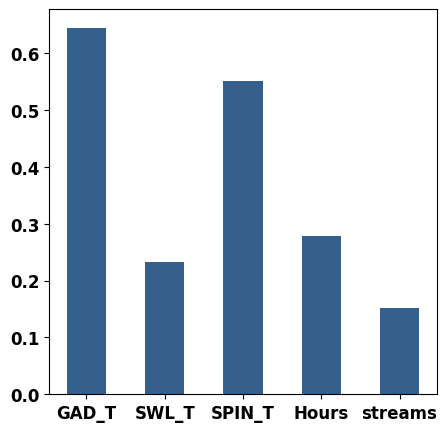

In [265]:
l1 = df[df['Label'] == 3]['GAD_T'].mean()
l2 = df[df['Label'] == 3]['SWL_T'].mean()
l3 = df[df['Label'] == 3]['SPIN_T'].mean()
l4 = df[df['Label'] == 3]['Hours'].mean()
l5 = df[df['Label'] == 3]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color = viridis(0.3),width = 0.5)
plt.show()

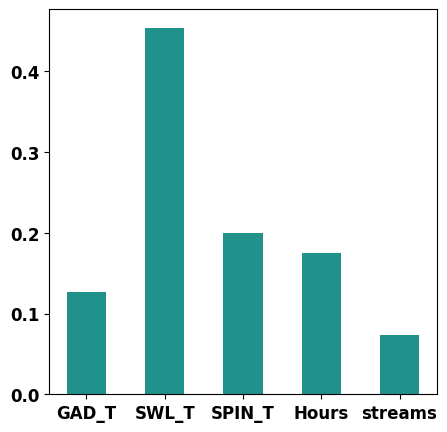

In [266]:
l1 = df[df['Label'] == 4]['GAD_T'].mean()
l2 = df[df['Label'] == 4]['SWL_T'].mean()
l3 = df[df['Label'] == 4]['SPIN_T'].mean()
l4 = df[df['Label'] == 4]['Hours'].mean()
l5 = df[df['Label'] == 4]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color = viridis(0.5),width = 0.5)
plt.show()

- **`Label 0`:** Individuals in this group tend to play more than they watch. They report being happy with life but also show signs of high social phobia.

- **`Label 1`:** This is the most favorable group, with members who report being in a good state of mental health. They are happy with their lives and find a balance between playing and socializing.

- **`Label 2`:** Individuals in this group have a balanced approach between playing games and watching streams. They express happiness with their lives but also exhibit signs of high social phobia.

- **`Label 3`:** This group is characterized by individuals experiencing very high anxiety levels, leading to extreme dissatisfaction with life.

- **`Label 4`:** Individuals in this group are considered average. They report moderate satisfaction with life but also experience mild anxiety and social phobia.







**K-Means Agglomerative Clustering Algorithm**

Let's better compare the performance of different cluster algorithms and evlauate our clusters stability.  

In [267]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
bestK = -1
bestCl = None

for k in range(2, 6):
    print('k = %d ' % k)
    clus = [KMeans(n_clusters=k), AgglomerativeClustering(n_clusters=k)]

    for cl in clus:
        res = cl.fit(df)
        sil = metrics.silhouette_score(df, res.labels_)
        print(str(cl)[:5] + ' with k = ' + str(k) + ": " + str(round(sil, 4)))

        if sil > bestSil:
            bestSil = sil
            bestCl = cl
            bestK = k

print('***********************************************')
print('Best algorithm is... ' + str(bestCl)[:6] + '  with k = ' + str(bestK))
print('**********************')
print('With Silhouette Score ' + str(bestSil))


k = 2 
KMean with k = 2: 0.4357
Agglo with k = 2: 0.4363
k = 3 
KMean with k = 3: 0.4865
Agglo with k = 3: 0.4856
k = 4 
KMean with k = 4: 0.5322
Agglo with k = 4: 0.531
k = 5 
KMean with k = 5: 0.517
Agglo with k = 5: 0.5352
***********************************************
Best algorithm is... Agglom  with k = 5
**********************
With Silhouette Score 0.5352145317281191


Based on the silhouette scores, we can observe the following:

- For each value of k, the Agglomerative Clustering algorithm tends to have slightly higher silhouette scores compared to K-Means clustering. Agglomerative Clustering may be performing slightly better in terms of clustering quality.

- The silhouette scores generally increase with an increase in the number of clusters (k), indicating that more clusters may provide better separation of data points.

- The best clustering result is achieved with Agglomerative Clustering with k = 5, which has a silhouette score of 0.5352.

In summary, the Agglomerative Clustering algorithm outperforms K-Means clustering on this dataset, and the best clustering result is achieved with five clusters, where data points are better separated into distinct clusters.

## **Random Forest Classification Model**



`RandomForestClassifier` helps create multiple decision trees during training. We hope to capture nonlinear relationships in the data. Despite not being the most accurate, it's generally less prone to overfitting and require fewer hyperparameter tuning efforts.

In [271]:
clf = RandomForestClassifier(n_estimators = 1000 , random_state=44, max_depth=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [272]:
clf.score(X_test,y_test)

0.8278858088539511

In [273]:
clf.score(X_train,y_train)

0.8775869205298014

In [274]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       495
           1       0.89      0.87      0.88       677
           2       0.73      0.77      0.75       338
           3       0.78      0.95      0.86       222
           4       0.84      0.79      0.82       685

    accuracy                           0.83      2417
   macro avg       0.81      0.84      0.82      2417
weighted avg       0.83      0.83      0.83      2417



- For class 0, the model achieved a precision of 0.81, recall of 0.80, and F1-score of 0.80. This indicates that the model correctly predicted 80% of class 0 instances with an 81% precision.

- Similar interpretations can be made for the other classes (1, 2, 3, 4).

- The overall accuracy of the model is 82%, indicating that it correctly classified 82% of instances.

- The macro-averaged F1-score is 0.82, which represents the balance between precision and recall across all classes.

- The weighted-averaged F1-score of 0.82 accounts for class imbalance and provides an overall measure of model performance.

In [ ]:
confusion_matrix(y_pred,y_test)

array([[395,   0,  29,  41,  31],
       [  3, 586,  36,   0,  59],
       [ 18,  19, 258,  23,  17],
       [  6,   0,   3, 205,   0],
       [ 68,  52,  31,   0, 537]])

Compare the model's predictions (`answer`) for a subset of test data including rows from index 30 to 44 (a total of 15 rows) with the actual target values (`y_test`) for the same subset

In [ ]:
answer = clf.predict(X_test.iloc[30:45,:])
print(list(answer))
print(y_test.iloc[30:45].to_list())

[1, 1, 0, 4, 4, 4, 1, 4, 2, 3, 4, 0, 0, 1, 0]
[1, 1, 2, 4, 0, 4, 1, 0, 2, 3, 1, 4, 0, 1, 0]


Let's compare each pair of predicted and actual values:

- **(Predicted: 1, Actual: 1)** - The model correctly predicted this data point.

- **(Predicted: 1, Actual: 1)** - Another correct prediction.

- **(Predicted: 0, Actual: 2)** - The model predicted 0, but the actual value is 2. This is a misclassification error.

- **(Predicted: 4, Actual: 4)** - Correct prediction.

- **(Predicted: 4, Actual: 0)** - The model predicted 4, but the actual value is 0. This is a misclassification error.

- **(Predicted: 4, Actual: 4)** - Correct prediction.

- **(Predicted: 1, Actual: 1)** - Correct prediction.

- **(Predicted: 4, Actual: 0)** - Misclassification error.

- **(Predicted: 2, Actual: 2)** - Correct prediction.

- **(Predicted: 3, Actual: 3)** - Correct prediction.

- **(Predicted: 4, Actual: 1)** - Misclassification error.

- **(Predicted: 0, Actual: 4)** - Misclassification error.

- **(Predicted: 0, Actual: 0)** - Correct prediction.

- **(Predicted: 1, Actual: 1)** - Correct prediction.

- **(Predicted: 0, Actual: 0)** - Correct prediction.

`Random Forest` classification model made some correct predictions (matches between predicted and actual values) but also some misclassifications (where predicted and actual values don't match) when applied to this specific subset of data.

**Logistic Regression Classification Model**

`LogisticRegression` classifier is trained on a training dataset (X_train, y_train), where X_train represents the feature matrix and y_train represents the corresponding target labels.

Let's train this model to make predictions on a the test set (X_test).

In [268]:
lc = LogisticRegression(max_iter=3250 , n_jobs=-1 )
lc.fit(X_train,y_train)
lc_pred = lc.predict(X_test)
accuracy_score(lc_pred,y_test)

0.9267687215556475

In [275]:
print(classification_report(lc_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       482
           1       0.94      0.95      0.94       651
           2       0.93      0.91      0.92       362
           3       0.92      0.94      0.93       263
           4       0.93      0.91      0.92       659

    accuracy                           0.93      2417
   macro avg       0.93      0.93      0.93      2417
weighted avg       0.93      0.93      0.93      2417



- **Class 0:** Precision of 0.91 means that 91% of the predicted instances for this class were correct. Recall of 0.93 indicates that 93% of the actual instances of Class 0 were correctly identified by the model. The F1-Score of 0.92 is a balanced measure of precision and recall.

- **Class 1:** High precision (0.94) and recall (0.95) indicate that the model performs very well in identifying Class 1 instances. The F1-Score of 0.94 suggests a strong balance between precision and recall.

- **Class 2:** Precision (0.93) and recall (0.91) for Class 2 are both high, indicating good model performance in this class. The F1-Score of 0.92 reflects a balanced measure.

- **Class 3:** Precision (0.92) and recall (0.94) for Class 3 show that the model performs well in identifying this class. The F1-Score of 0.93 is indicative of a good balance.

- **Class 4:** Precision (0.93) and recall (0.91) for Class 4 are both high, suggesting strong performance. The F1-Score of 0.92 represents a good trade-off between precision and recall.

- **Accuracy:** The overall accuracy of the model across all classes is 93%, meaning that 93% of the predictions made by the model are correct.

- **Macro Avg:** The macro average of precision, recall, and F1-Score is 0.93, indicating good overall performance across all classes.

- **Weighted Avg:** The weighted average of precision, recall, and F1-Score is also 0.93, considering class imbalance in the dataset. It demonstrates the model's performance while considering the varying support (number of samples) for each class.

In [276]:
print(confusion_matrix(lc_pred,y_test))

[[447   0   8  12  15]
 [  0 617  11   0  23]
 [  4   9 331   9   9]
 [ 12   0   3 248   0]
 [ 27  31   4   0 597]]


The confusion matrix reveals the model's performance for each class. It shows that the model is quite effective in correctly predicting Classes 0, 1, 2, and 3 with relatively few false predictions. However, it appears to have more difficulty with Class 4, with a notable number of instances from other classes being wrongly predicted as Class 4 (false positives).

In [277]:
lc.score(X_train,y_train)

0.9347061258278145

In [278]:
lc.score(X_test,y_test)

0.9267687215556475

## **Result**

`LogisticRegression` classification model performs better than the `RandomForestClassifier` one due to the correctly predicting Classes 0, 1, 2, and 3 more consistently without being overfitted.